In [147]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from utils.mutual_info import entropy

In [148]:
print(pd.__version__)

1.4.4


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [149]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [150]:
carpeta="data/Only_training_hipotesis_salida2/"

In [185]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida2\\pTEST_new_0.05_0.csv.pickle'

In [186]:
dasdas =pd.read_pickle(a[0])
dasdas.M_Align[0]

array([[0.0855896 , 0.00434394, 0.08687423, ..., 0.        , 0.        ,
        0.        ],
       [0.08687423, 0.00487096, 0.58782685, ..., 0.        , 0.        ,
        0.        ],
       [0.21101676, 0.        , 0.5141004 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [153]:
etiquetas=['entailment','neutral','contradiction']

In [154]:
def normalizar01(X):
    return (X-np.min(X))/(np.max(X)-np.min(X))

In [155]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

In [156]:
pru=np.array([[2.760008  , 0.0330354 , 1,  0.   ],
       [0.17006608, 0.00487096, 0.18782685,  1.   ],
       [0.47006608, 0.00487096, 0.28782685,  0.   ]])
scale(pru,0,1)
#print(np.array(pru))

array([[1.        , 1.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.11583271, 0.        , 0.12312645, 0.        ]])

In [157]:
X = np.array([
    [ 0,  1],
    [ 2,  3],
    [ 4,  5],
    [ 6,  7],
    [ 8,  9],
    [10, 11],
    [12, 13],
    [14, 15]
])
X_scaled = normalizar01(X)
print(X_scaled)

[[0.         0.06666667]
 [0.13333333 0.2       ]
 [0.26666667 0.33333333]
 [0.4        0.46666667]
 [0.53333333 0.6       ]
 [0.66666667 0.73333333]
 [0.8        0.86666667]
 [0.93333333 1.        ]]


In [158]:
stats.zscore([1,2,3,4,7])

array([-1.16554303, -0.6799001 , -0.19425717,  0.29138576,  1.74831455])

In [159]:
17/5

3.4

In [160]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    #probs = [np.mean(X == valor) for valor in set(X)]
    X_l=list(X)
    probs = [X_l.count(valor)/len(X) for valor in set(X)]
    return round(sum(-p * np.log2(p) for p in probs)/np.log2(len(X)), 3)

In [161]:
entropia_f([0,1,2,3])

1.0

In [188]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_entropia=[]
                for index,strings in temp.iterrows():
                    t=strings[1]
                    h=strings[2]
                    matriz=strings[5]
                    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                    #l_entropia.append(entropia_f(stats.zscore(np.round(matriz_c.T, decimals = 2)).flatten()))
                    #l_entropia.append(entropia_f(np.round(matriz_c.T.flatten(), decimals = 1)))
                    
                    l_entropia.append(entropia_f(scale(np.round(matriz_c, decimals = 2),0,1).flatten()))
                new_data['entropia'].append(np.array(l_entropia[:]))
                new_data['Paraphrase'].append(i)
                l_entropia.clear()
dfn=pd.DataFrame(new_data)

In [189]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse_SCALE.pickle")

In [382]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse_SCALE.pickle")

In [383]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,91,entailment_entailment,"[0.838, 0.722, 0.816, 0.798, 0.723, 0.848, 0.8...",0
1,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,7,entailment_neutral,"[0.782, 0.764, 0.791, 0.607, 0.749, 0.833, 0.787]",0
2,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[0.901, 0.782, 0.762]",0
3,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,17,neutral_entailment,"[0.798, 0.817, 0.681, 0.817, 0.646, 0.693, 0.7...",0
4,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,103,neutral_neutral,"[0.772, 0.718, 0.752, 0.769, 0.797, 0.755, 0.7...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[0.664, 0.738, 0.762, 0.814, 0.811, 0.797, 0.7...",1
2174,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[0.802, 0.743, 0.803, 0.7, 0.757, 0.877, 0.756...",1
2175,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[0.826, 0.802, 0.89, 0.697, 0.752, 0.654, 0.81...",1
2176,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[0.612, 0.802, 0.787, 0.708, 0.553, 0.797, 0.7...",1


In [384]:
len(dfn['grupo'].unique())

7

In [385]:
dfn['entropia'][0]

array([0.838, 0.722, 0.816, 0.798, 0.723, 0.848, 0.814, 0.773, 0.8  ,
       0.876, 0.756, 0.914, 0.683, 0.772, 0.75 , 0.739, 0.814, 0.75 ,
       0.857, 0.798, 0.71 , 0.757, 0.777, 0.773, 0.78 , 0.793, 0.718,
       0.705, 0.667, 0.84 , 0.767, 0.742, 0.827, 0.679, 0.759, 0.637,
       0.802, 0.788, 0.837, 0.821, 0.858, 0.781, 0.822, 0.73 , 0.718,
       0.68 , 0.821, 0.791, 0.712, 0.827, 0.714, 0.867, 0.666, 0.809,
       0.759, 0.825, 0.807, 0.785, 0.823, 0.654, 0.828, 0.791, 0.781,
       0.828, 0.805, 0.775, 0.764, 0.791, 0.8  , 0.668, 0.742, 0.763,
       0.739, 0.967, 0.716, 0.726, 0.732, 0.848, 0.811, 0.774, 0.819,
       0.774, 0.672, 0.771, 0.784, 0.628, 0.772, 0.903, 0.788, 0.788,
       0.813])

In [386]:
etiquetas=['entailment','neutral','contradiction']
etiquetas

['entailment', 'neutral', 'contradiction']

In [387]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Boxplot de 100 parafrasis y no

In [388]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,91,entailment_entailment,"[0.838, 0.722, 0.816, 0.798, 0.723, 0.848, 0.8...",0
1,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,7,entailment_neutral,"[0.782, 0.764, 0.791, 0.607, 0.749, 0.833, 0.787]",0
2,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[0.901, 0.782, 0.762]",0
3,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,17,neutral_entailment,"[0.798, 0.817, 0.681, 0.817, 0.646, 0.693, 0.7...",0
4,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,103,neutral_neutral,"[0.772, 0.718, 0.752, 0.769, 0.797, 0.755, 0.7...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[0.664, 0.738, 0.762, 0.814, 0.811, 0.797, 0.7...",1
2174,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[0.802, 0.743, 0.803, 0.7, 0.757, 0.877, 0.756...",1
2175,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[0.826, 0.802, 0.89, 0.697, 0.752, 0.654, 0.81...",1
2176,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[0.612, 0.802, 0.787, 0.708, 0.553, 0.797, 0.7...",1


In [389]:
sub_df =dfn[dfn["grupo"]==100.0]
sub_df

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
2160,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2120,1864,entailment_entailment,"[0.856, 0.759, 0.761, 0.781, 0.785, 0.859, 0.8...",0
2161,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2120,206,entailment_neutral,"[0.795, 0.797, 0.863, 0.701, 0.846, 0.724, 0.8...",0
2162,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2120,50,entailment_contradiction,"[0.782, 0.824, 0.692, 0.819, 0.901, 0.756, 0.9...",0
2163,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,233,neutral_entailment,"[0.777, 0.808, 0.795, 0.757, 0.706, 0.773, 0.7...",0
2164,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,2016,neutral_neutral,"[0.819, 0.723, 0.776, 0.794, 0.788, 0.772, 0.7...",0
2165,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,186,neutral_contradiction,"[0.755, 0.726, 0.763, 0.749, 0.848, 0.871, 0.7...",0
2166,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,87,contradiction_entailment,"[0.799, 0.714, 0.802, 0.735, 0.855, 0.719, 0.7...",0
2167,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,260,contradiction_neutral,"[0.736, 0.702, 0.733, 0.827, 0.739, 0.778, 0.6...",0
2168,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,1917,contradiction_contradiction,"[0.727, 0.823, 0.781, 0.844, 0.816, 0.829, 0.8...",0
2169,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2120,1737,entailment_entailment,"[0.792, 0.772, 0.84, 0.832, 0.775, 0.722, 0.75...",1


In [390]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [391]:
valores_labels=[]
lista_xs =[]
for el in labels:
    for i in [0,1]:
        a=sub_df[(sub_df['E_P']==el) & (sub_df['Paraphrase']==i)]
        b=a['entropia'].values[0]
        valores_labels.append(b)
        lista_xs.append(el+"_p"+str(i))
valores_labels

[array([0.856, 0.759, 0.761, ..., 0.686, 0.761, 0.742]),
 array([0.792, 0.772, 0.84 , ..., 0.693, 0.809, 0.755]),
 array([0.795, 0.797, 0.863, 0.701, 0.846, 0.724, 0.804, 0.762, 0.732,
        0.773, 0.663, 0.715, 0.74 , 0.697, 0.814, 0.791, 0.771, 0.88 ,
        0.682, 0.741, 0.735, 0.889, 0.758, 0.826, 0.77 , 0.678, 0.815,
        0.76 , 0.747, 0.767, 0.861, 0.826, 0.862, 0.777, 0.76 , 0.801,
        0.798, 0.883, 0.704, 0.826, 0.767, 0.771, 0.753, 0.793, 0.742,
        0.716, 0.749, 0.773, 0.756, 0.788, 0.764, 0.744, 0.777, 0.754,
        0.67 , 0.729, 0.835, 0.687, 0.695, 0.814, 0.728, 0.781, 0.778,
        0.771, 0.808, 0.745, 0.693, 0.807, 0.735, 0.725, 0.807, 0.718,
        0.843, 0.806, 0.743, 0.729, 0.746, 0.779, 0.775, 0.706, 0.715,
        0.852, 0.736, 0.72 , 0.806, 0.838, 0.753, 0.781, 0.782, 0.847,
        0.8  , 0.771, 0.78 , 0.642, 0.789, 0.721, 0.646, 0.716, 0.83 ,
        0.774, 0.759, 0.765, 0.692, 0.791, 0.607, 0.79 , 0.767, 0.808,
        0.742, 0.818, 0.752, 0.726

([<matplotlib.axis.XTick at 0x23241251370>,
 [Text(0, 0, 'entailment_entailment_p0'),
  Text(1, 0, 'entailment_entailment_p1'),
  Text(2, 0, 'entailment_neutral_p0'),
  Text(3, 0, 'entailment_neutral_p1'),
  Text(4, 0, 'entailment_contradiction_p0'),
  Text(5, 0, 'entailment_contradiction_p1'),
  Text(6, 0, 'neutral_entailment_p0'),
  Text(7, 0, 'neutral_entailment_p1'),
  Text(8, 0, 'neutral_neutral_p0'),
  Text(9, 0, 'neutral_neutral_p1'),
  Text(10, 0, 'neutral_contradiction_p0'),
  Text(11, 0, 'neutral_contradiction_p1'),
  Text(12, 0, 'contradiction_entailment_p0'),
  Text(13, 0, 'contradiction_entailment_p1'),
  Text(14, 0, 'contradiction_neutral_p0'),
  Text(15, 0, 'contradiction_neutral_p1'),
  Text(16, 0, 'contradiction_contradiction_p0'),
  Text(17, 0, 'contradiction_contradiction_p1')])

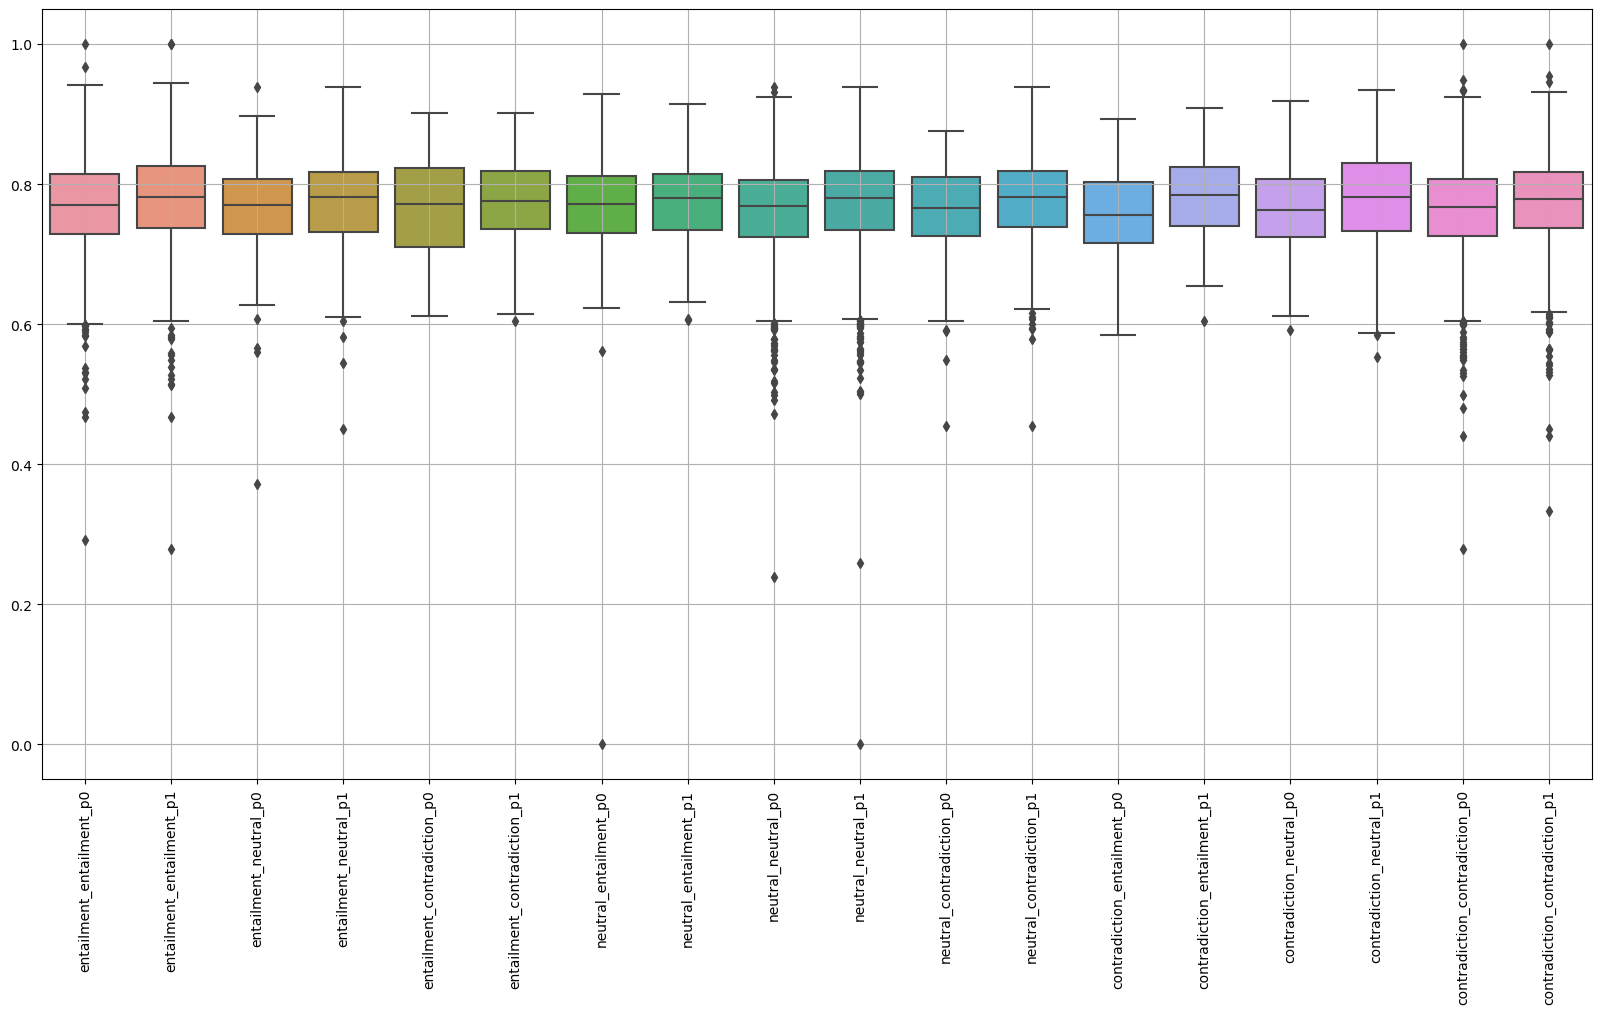

In [392]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(18),lista_xs,rotation=90)

In [393]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el) & (dfn['Paraphrase']==0)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([0.838, 0.722, 0.816, 0.798, 0.723, 0.848, 0.814, 0.773, 0.8  ,
        0.876, 0.756, 0.914, 0.683, 0.772, 0.75 , 0.739, 0.814, 0.75 ,
        0.857, 0.798, 0.71 , 0.757, 0.777, 0.773, 0.78 , 0.793, 0.718,
        0.705, 0.667, 0.84 , 0.767, 0.742, 0.827, 0.679, 0.759, 0.637,
        0.802, 0.788, 0.837, 0.821, 0.858, 0.781, 0.822, 0.73 , 0.718,
        0.68 , 0.821, 0.791, 0.712, 0.827, 0.714, 0.867, 0.666, 0.809,
        0.759, 0.825, 0.807, 0.785, 0.823, 0.654, 0.828, 0.791, 0.781,
        0.828, 0.805, 0.775, 0.764, 0.791, 0.8  , 0.668, 0.742, 0.763,
        0.739, 0.967, 0.716, 0.726, 0.732, 0.848, 0.811, 0.774, 0.819,
        0.774, 0.672, 0.771, 0.784, 0.628, 0.772, 0.903, 0.788, 0.788,
        0.813]),
 array([0.782, 0.764, 0.791, 0.607, 0.749, 0.833, 0.787]),
 array([0.901, 0.782, 0.762]),
 array([0.798, 0.817, 0.681, 0.817, 0.646, 0.693, 0.759, 0.841, 0.78 ,
        0.788, 0.802, 0.799, 0.641, 0.784, 0.802, 0.859, 0.757]),
 array([0.772, 0.718, 0.752, 0.769, 0.797, 0.7

In [394]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x2322c68a1c0>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

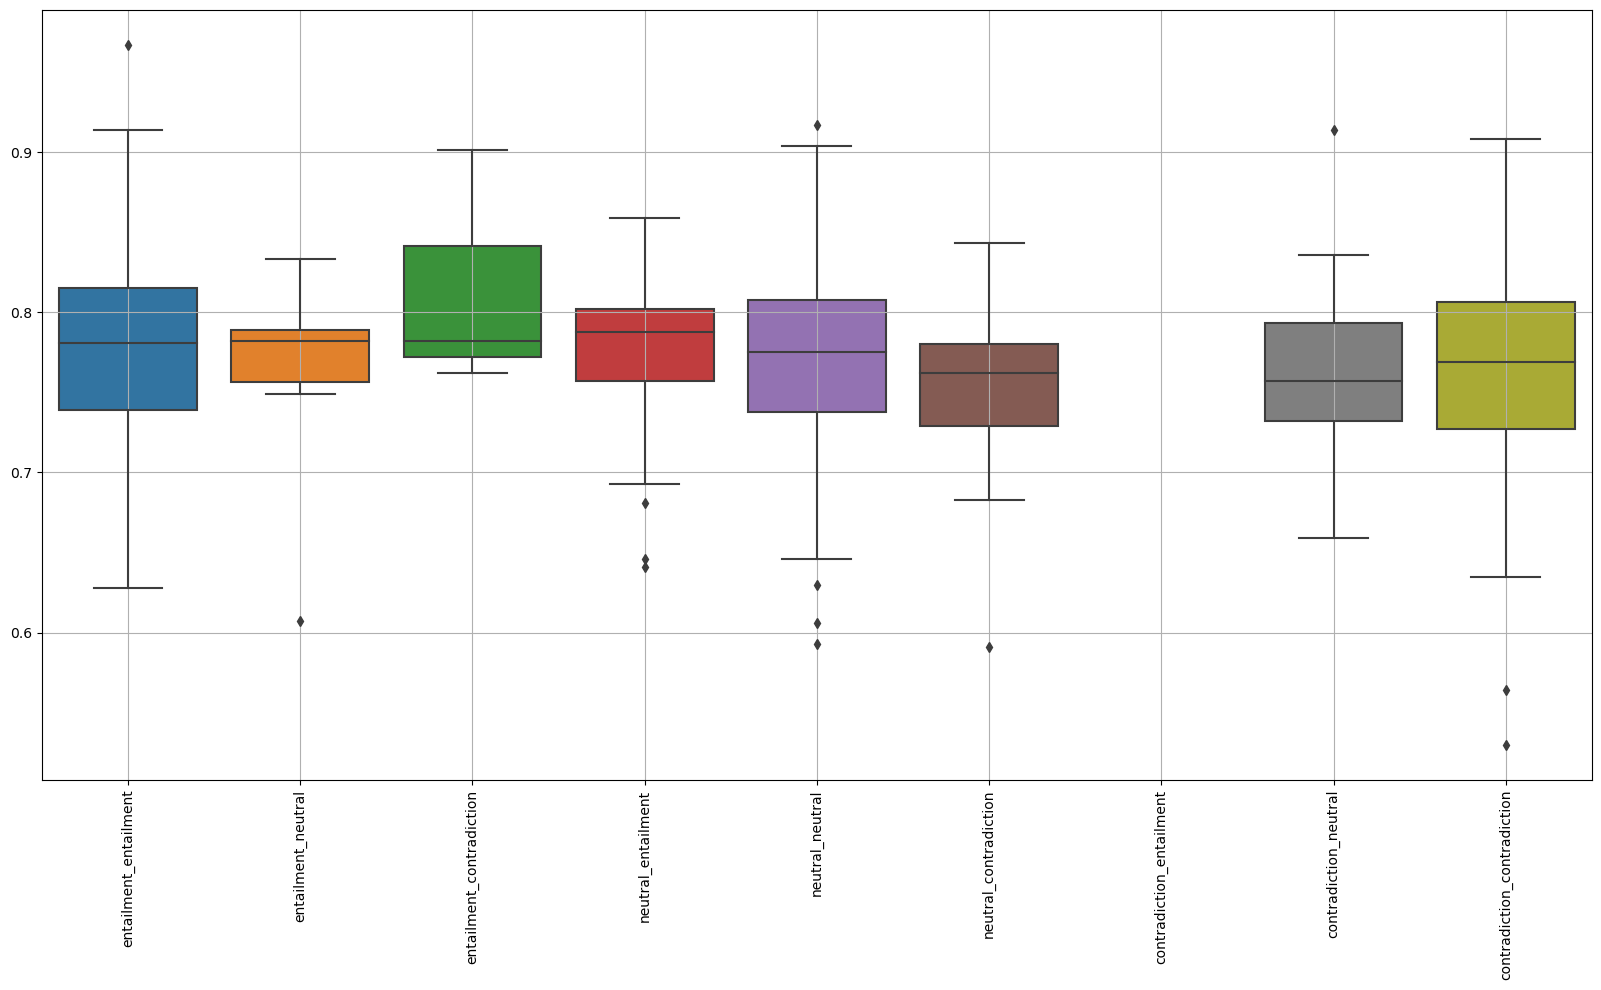

In [395]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [396]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            if(len(strings['entropia'])!=0):
                #l_mean_entropia.append(np.mean(np.round((strings['entropia']-minimo)/(maximo-minimo),2)))
                l_mean_entropia.append(np.mean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

In [397]:
l_grupos_p=dfn.grupo.unique()
labels_g_p=[]
datos_g_p=[]
grupo_g_p=[]
for lg in l_grupos_p:
    for lab in labels:
        l_mean_entropia_p=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
        for index,strings in temp.iterrows():
            if(len(strings['entropia'])!=0):
                #minimo=np.min(strings['entropia'])
                #maximo=np.max(strings['entropia'])
                #l_mean_entropia_p.append(np.mean(np.round((strings['entropia']-minimo)/(maximo-minimo),2)))
                l_mean_entropia_p.append(np.mean(strings['entropia']))
        labels_g_p.append(lab)
        datos_g_p.append(l_mean_entropia_p[:])
        l_mean_entropia_p.clear()
        grupo_g_p.append(lg)

In [398]:
distancias_p=datos_g_p[45:54]# son el grupo de los 80
distancias = datos_g[45:54]# son el grupo de los 80

In [399]:
len(grupo_g)

63

In [400]:
labels_g

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction',
 'entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction',
 'entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction',
 'entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction',
 'entailment_entailment',
 'entailment_neutral',
 'entailment_co

In [401]:
len(datos_g[0])

20

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

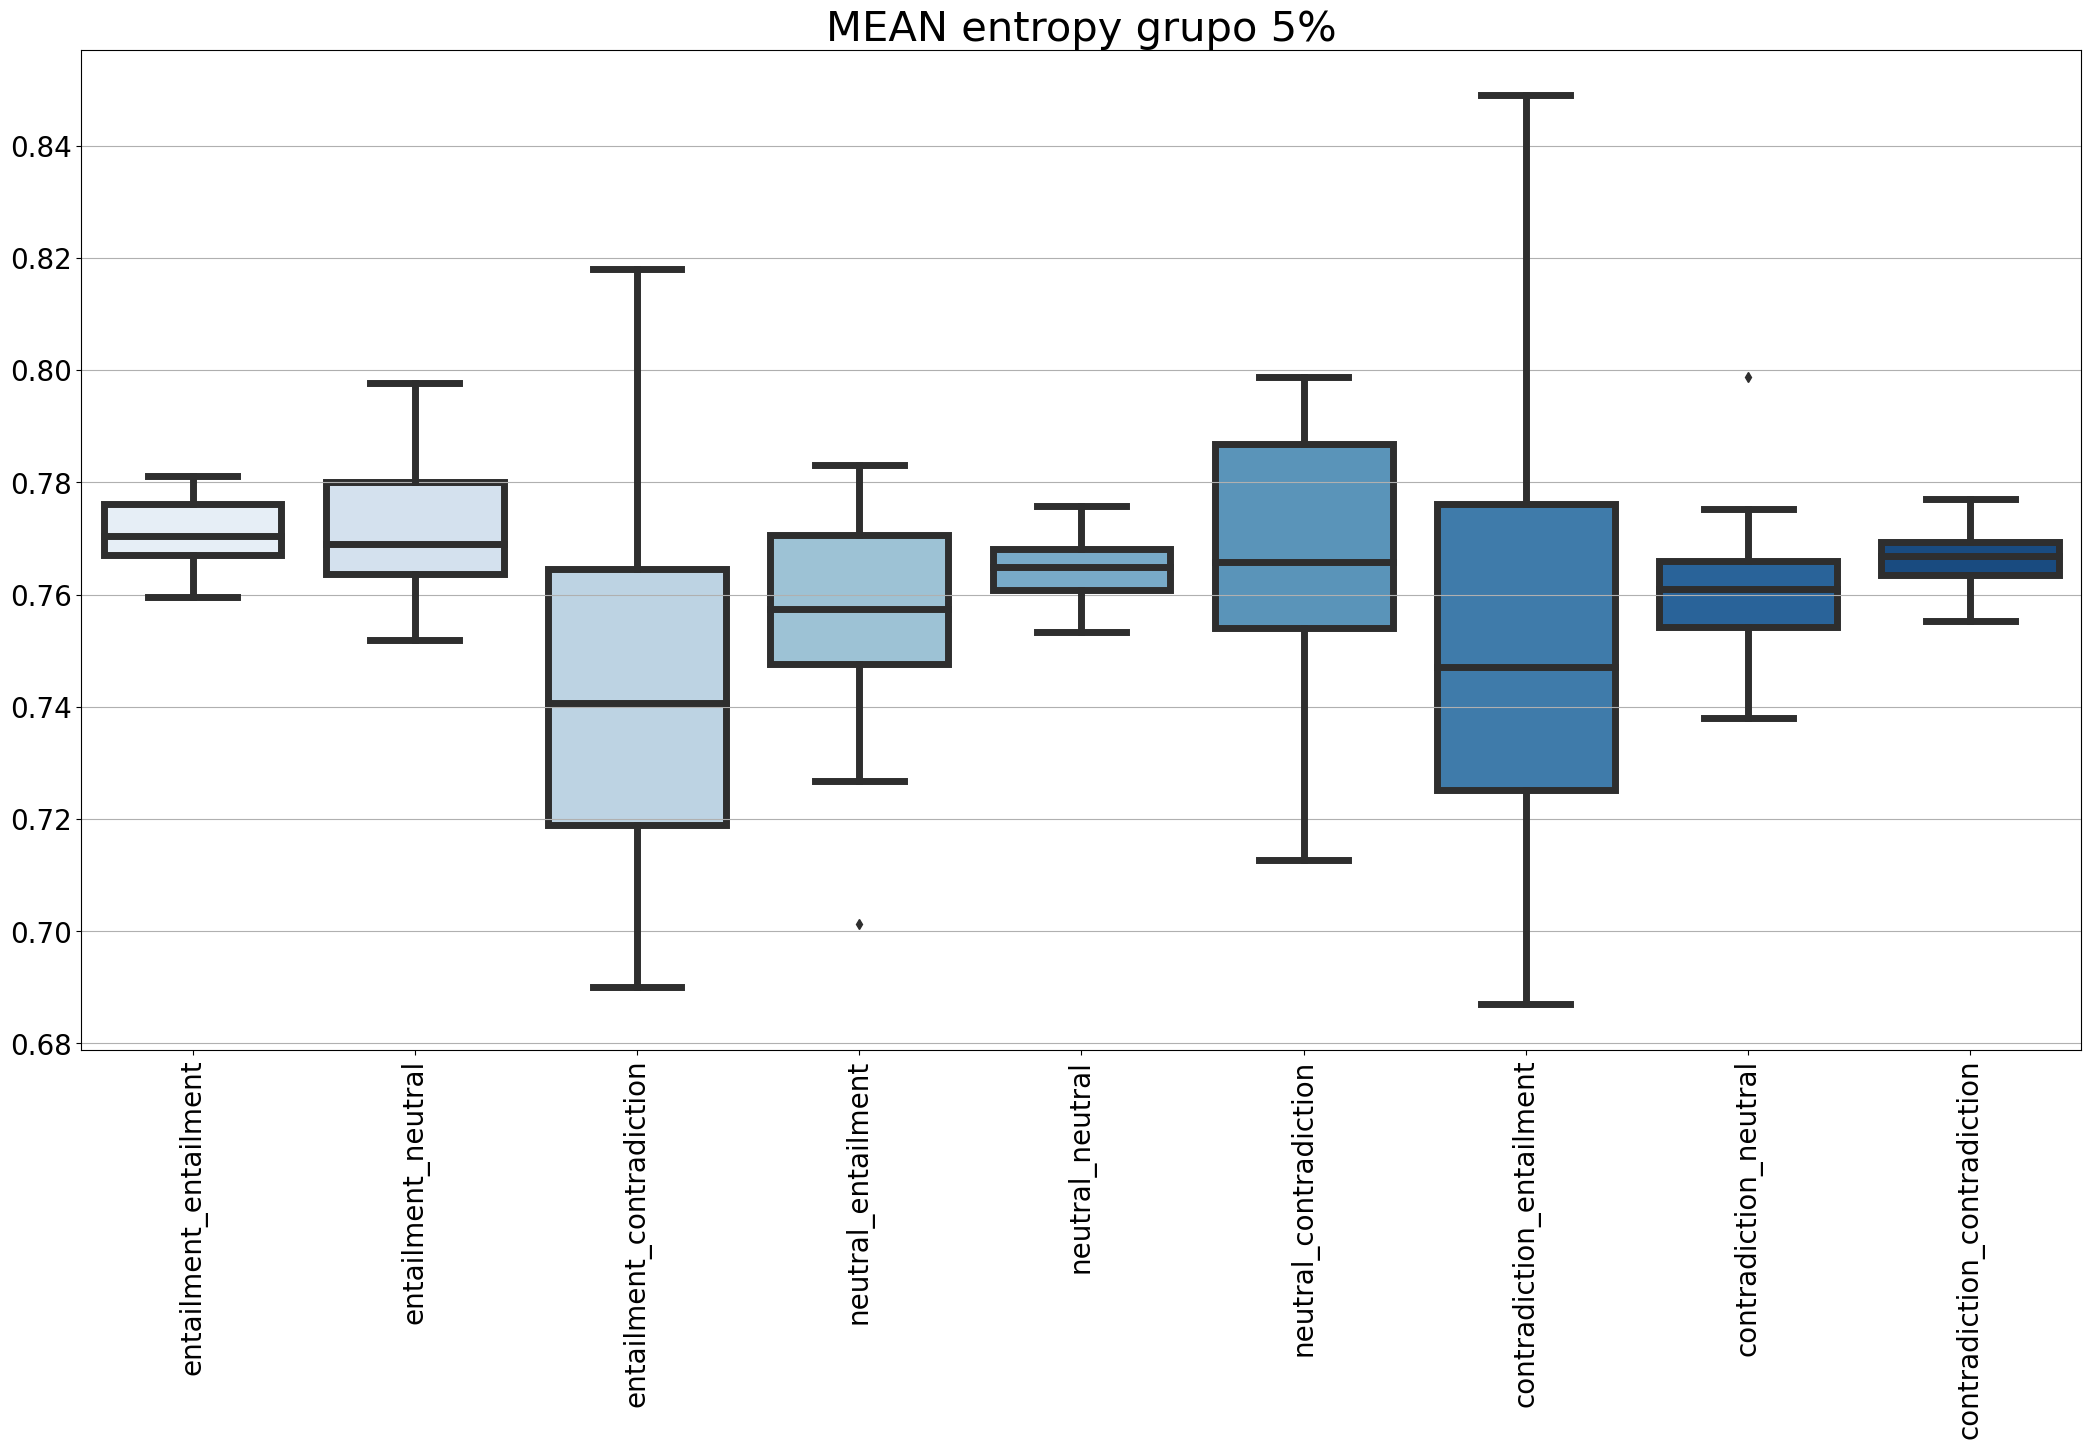

In [402]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[:9],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[:9],fontsize=20,rotation=90)


[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


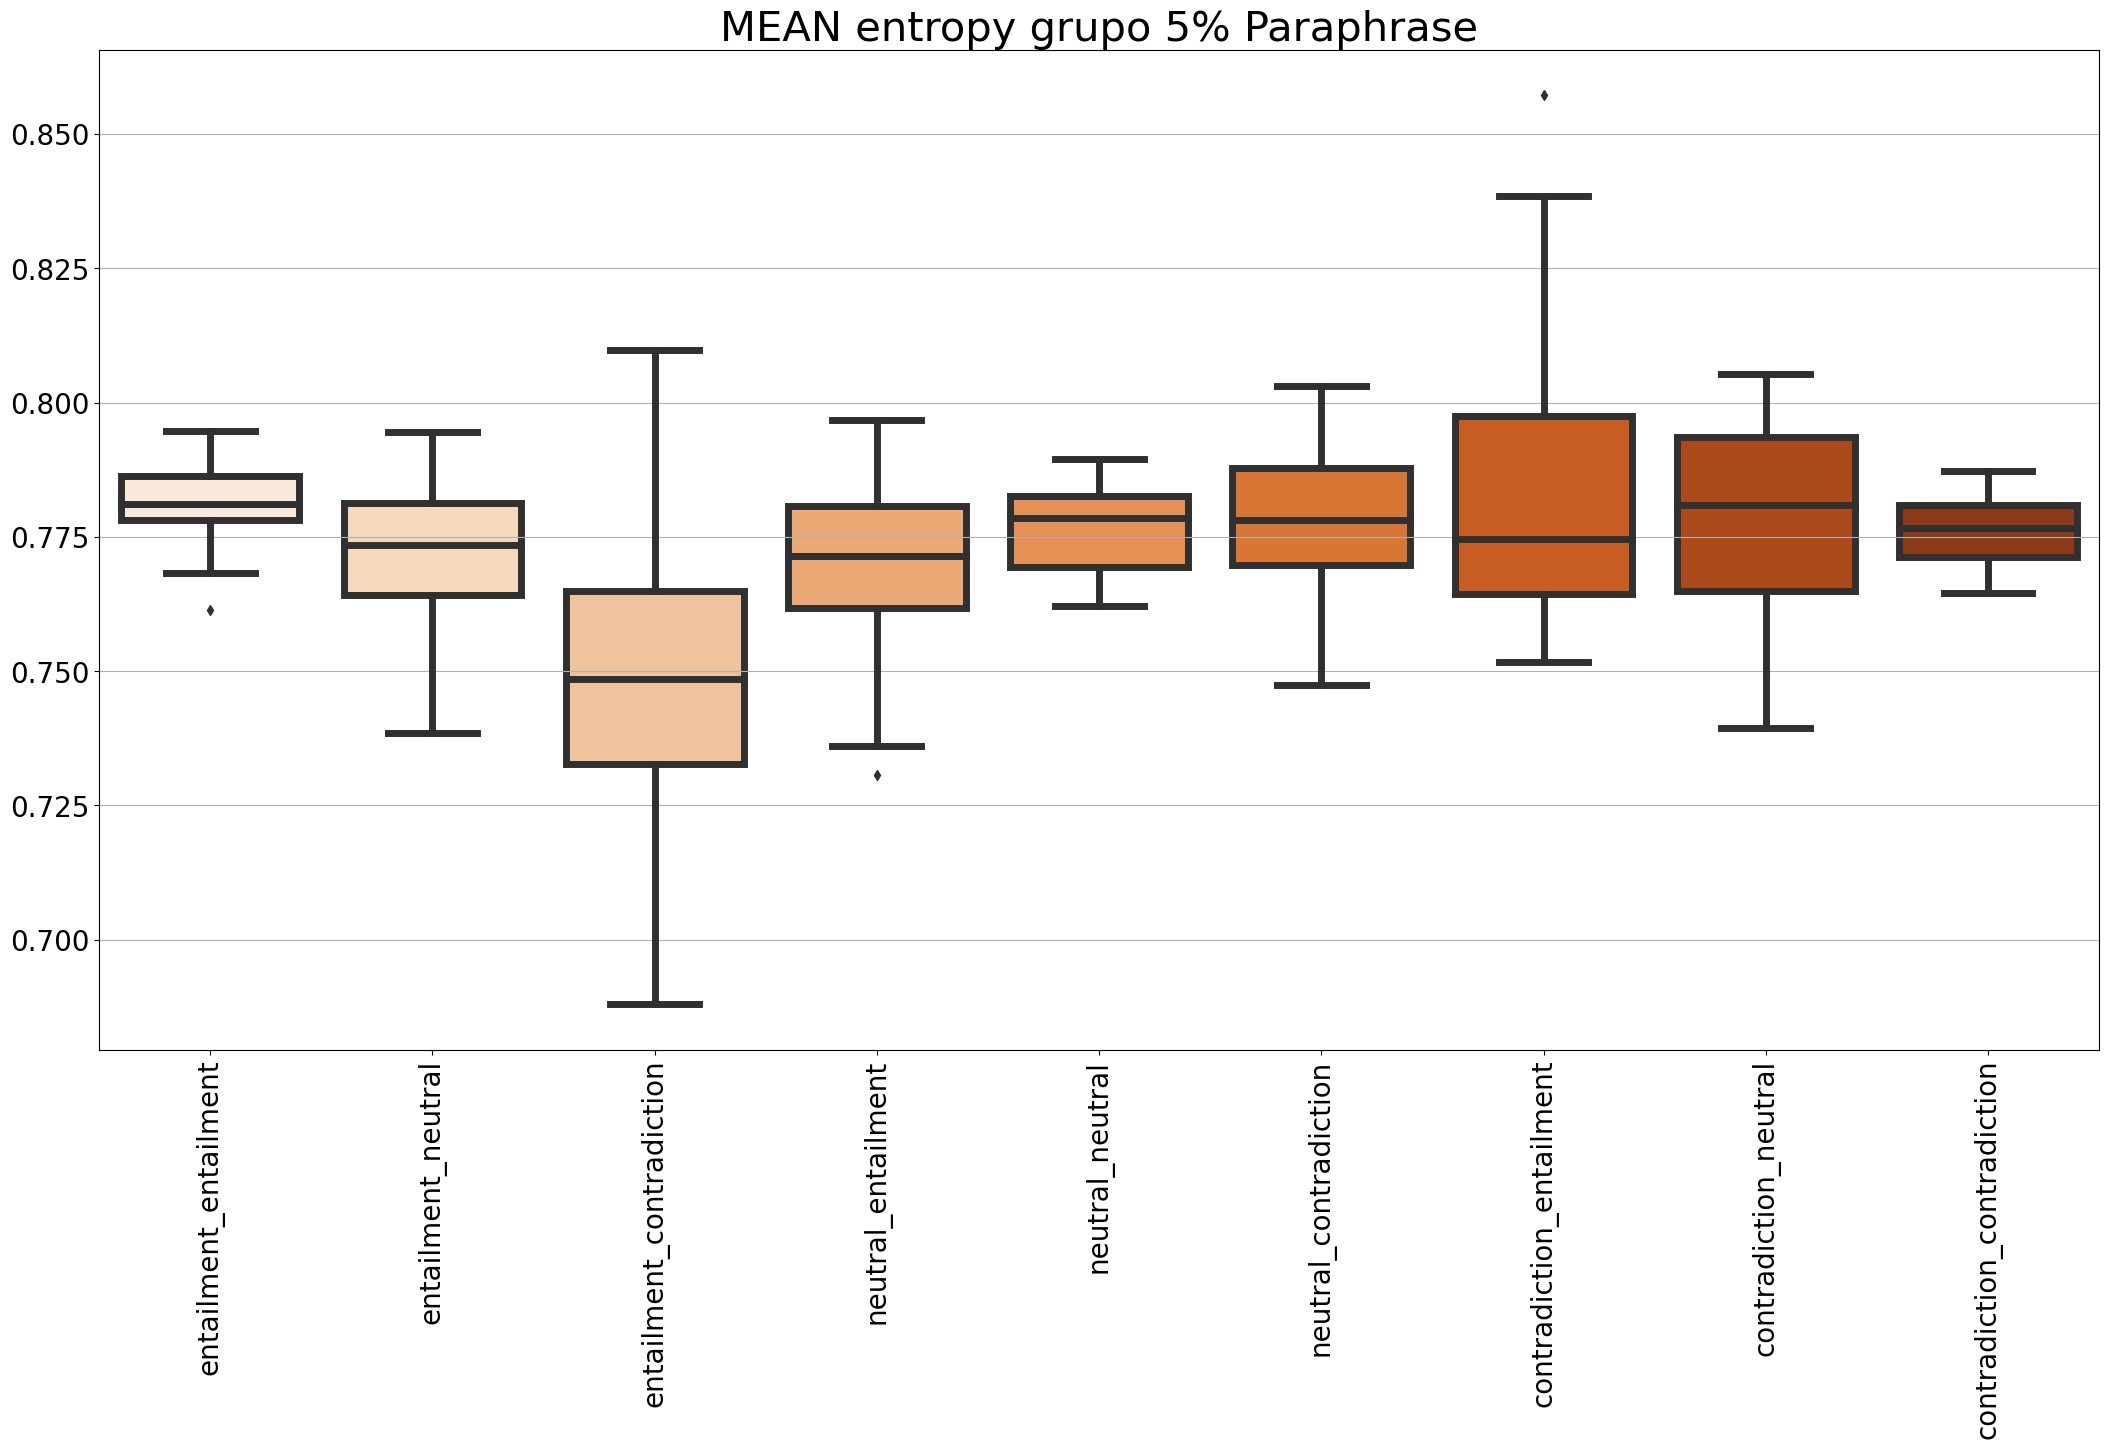

In [403]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[:9],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[:9],fontsize=20,rotation=90)
print(grupo_g_p[:9])


[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]


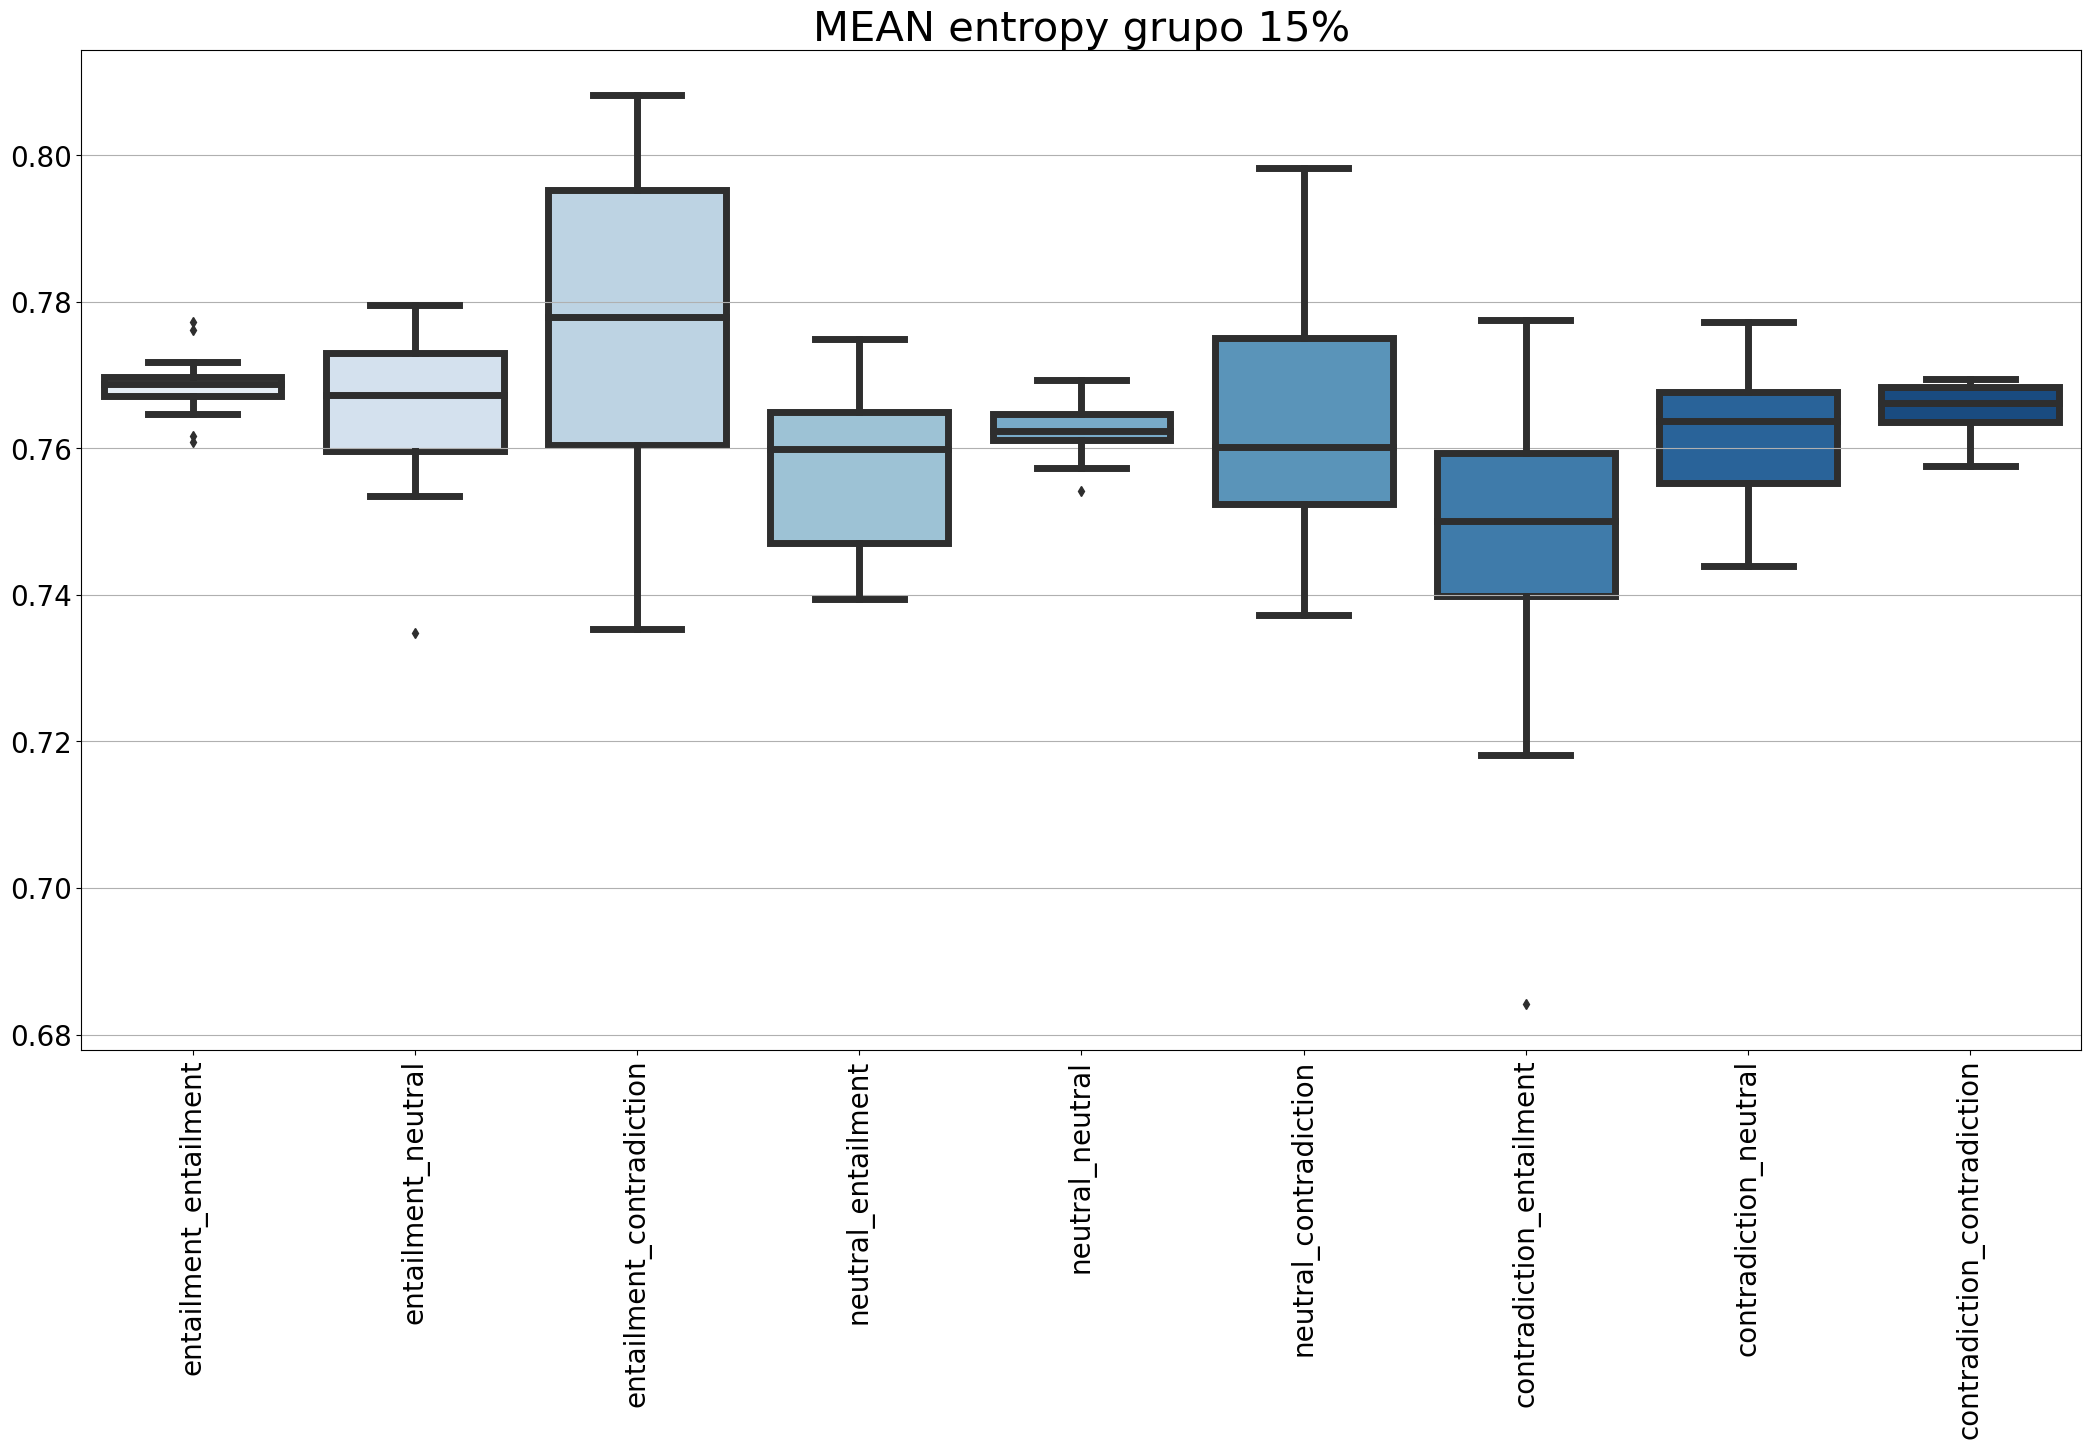

In [404]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[9:18],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[9:18],fontsize=20,rotation=90)
print(grupo_g[9:18])

[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]


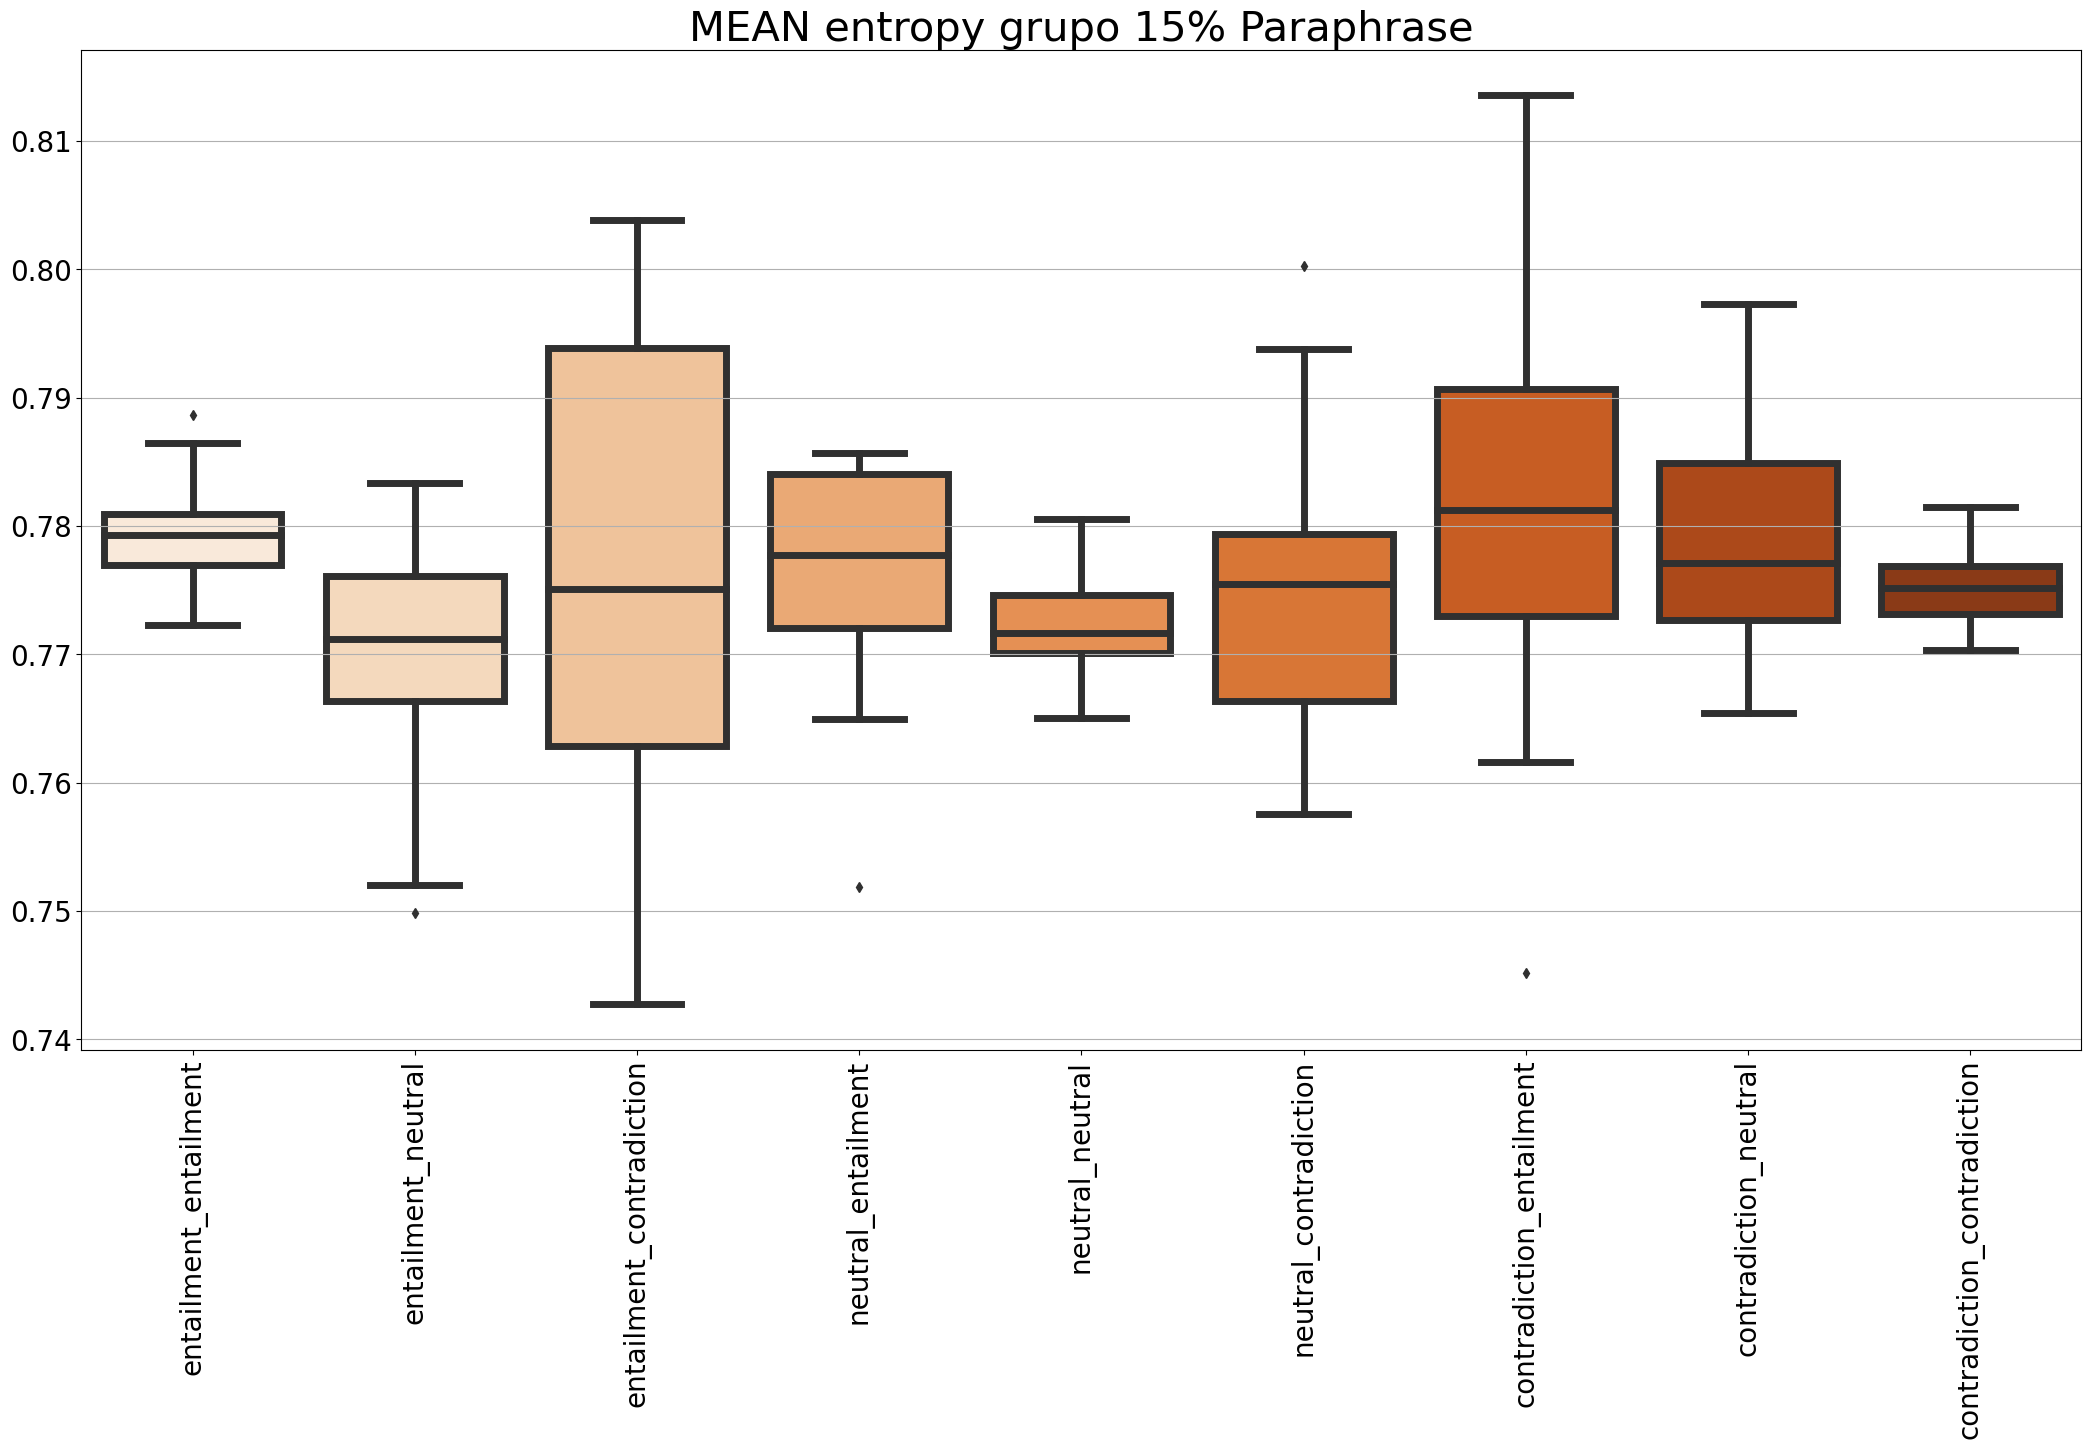

In [405]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[9:18],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[9:18],fontsize=20,rotation=90)
print(grupo_g_p[9:18])

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


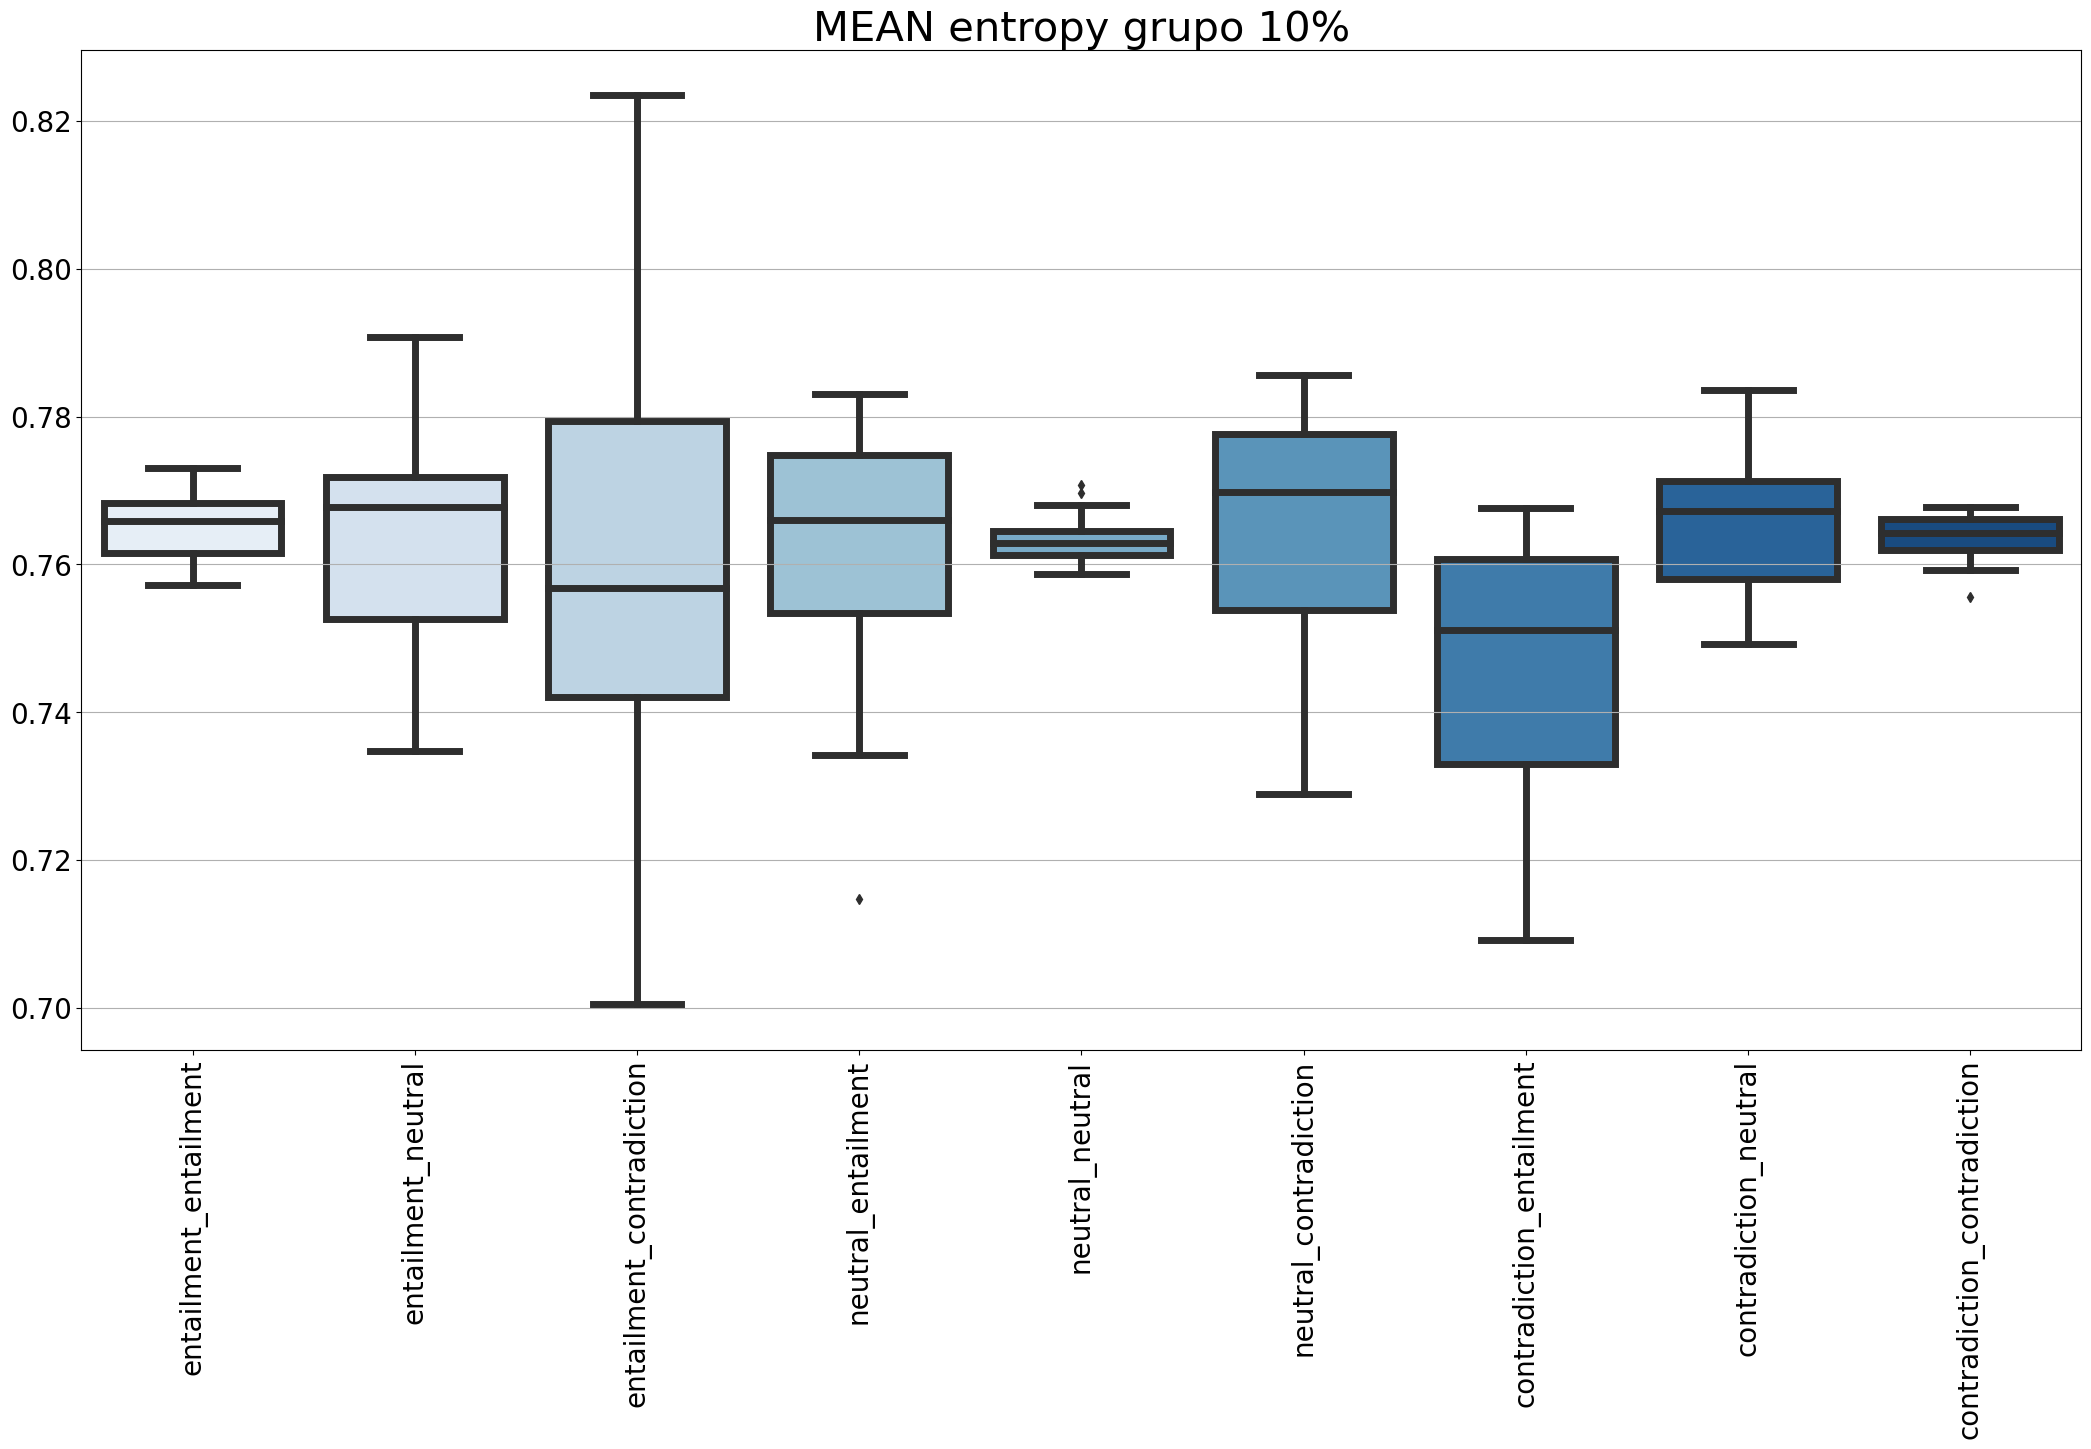

In [406]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[18:27],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[18:27],fontsize=20,rotation=90)
print(grupo_g[18:27])

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


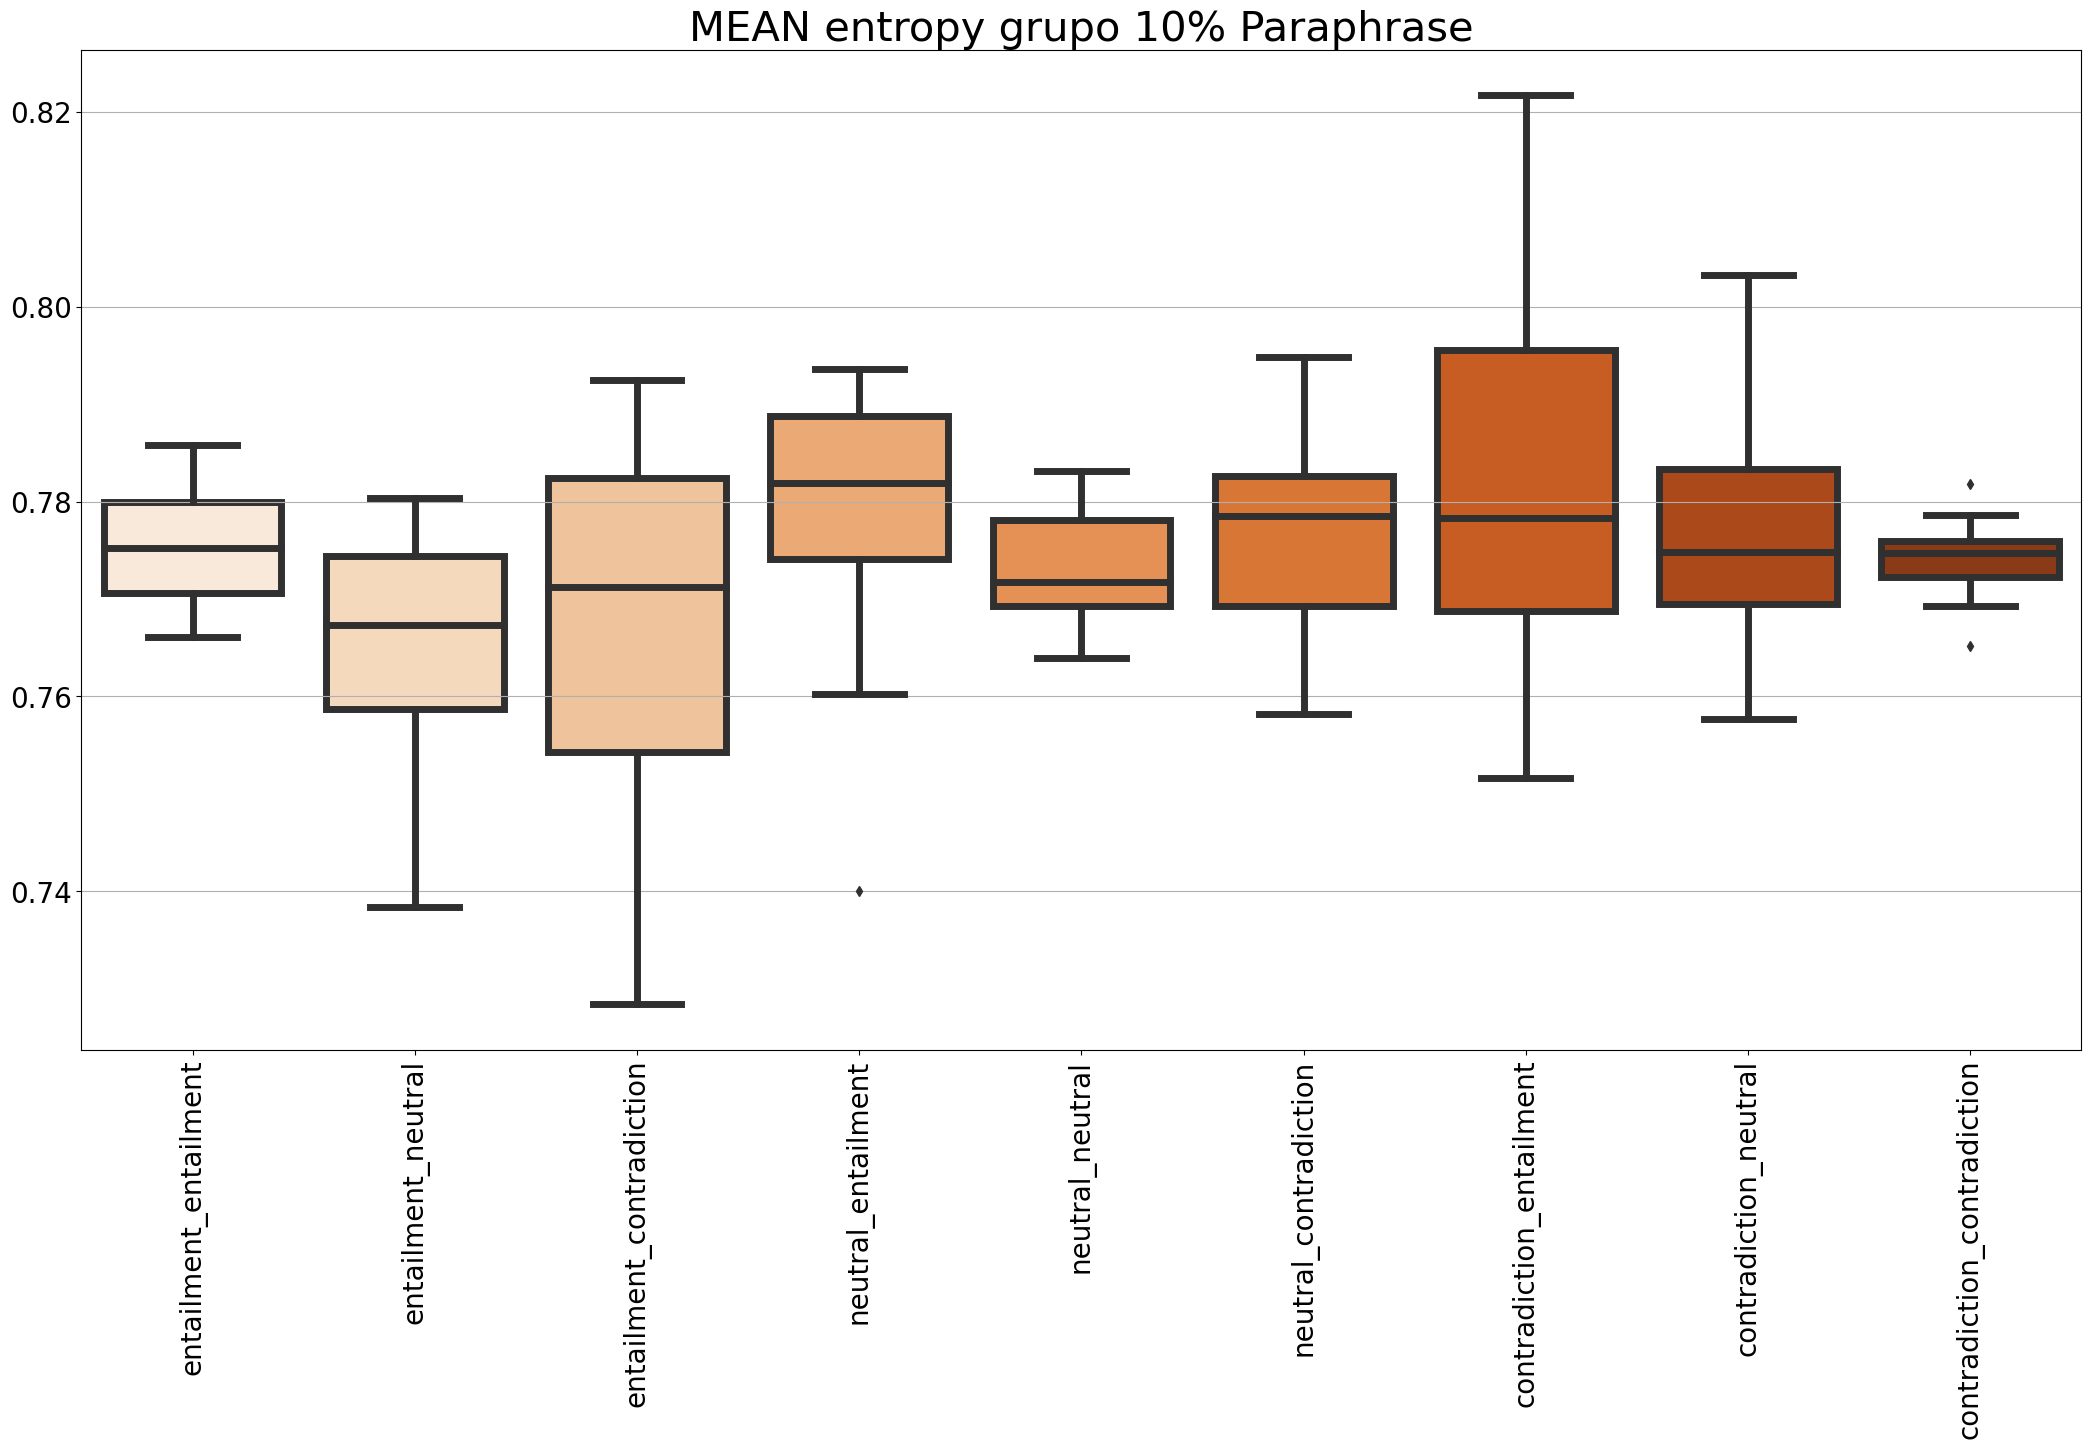

In [407]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[18:27],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[18:27],fontsize=20,rotation=90)
print(grupo_g_p[18:27])

[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]


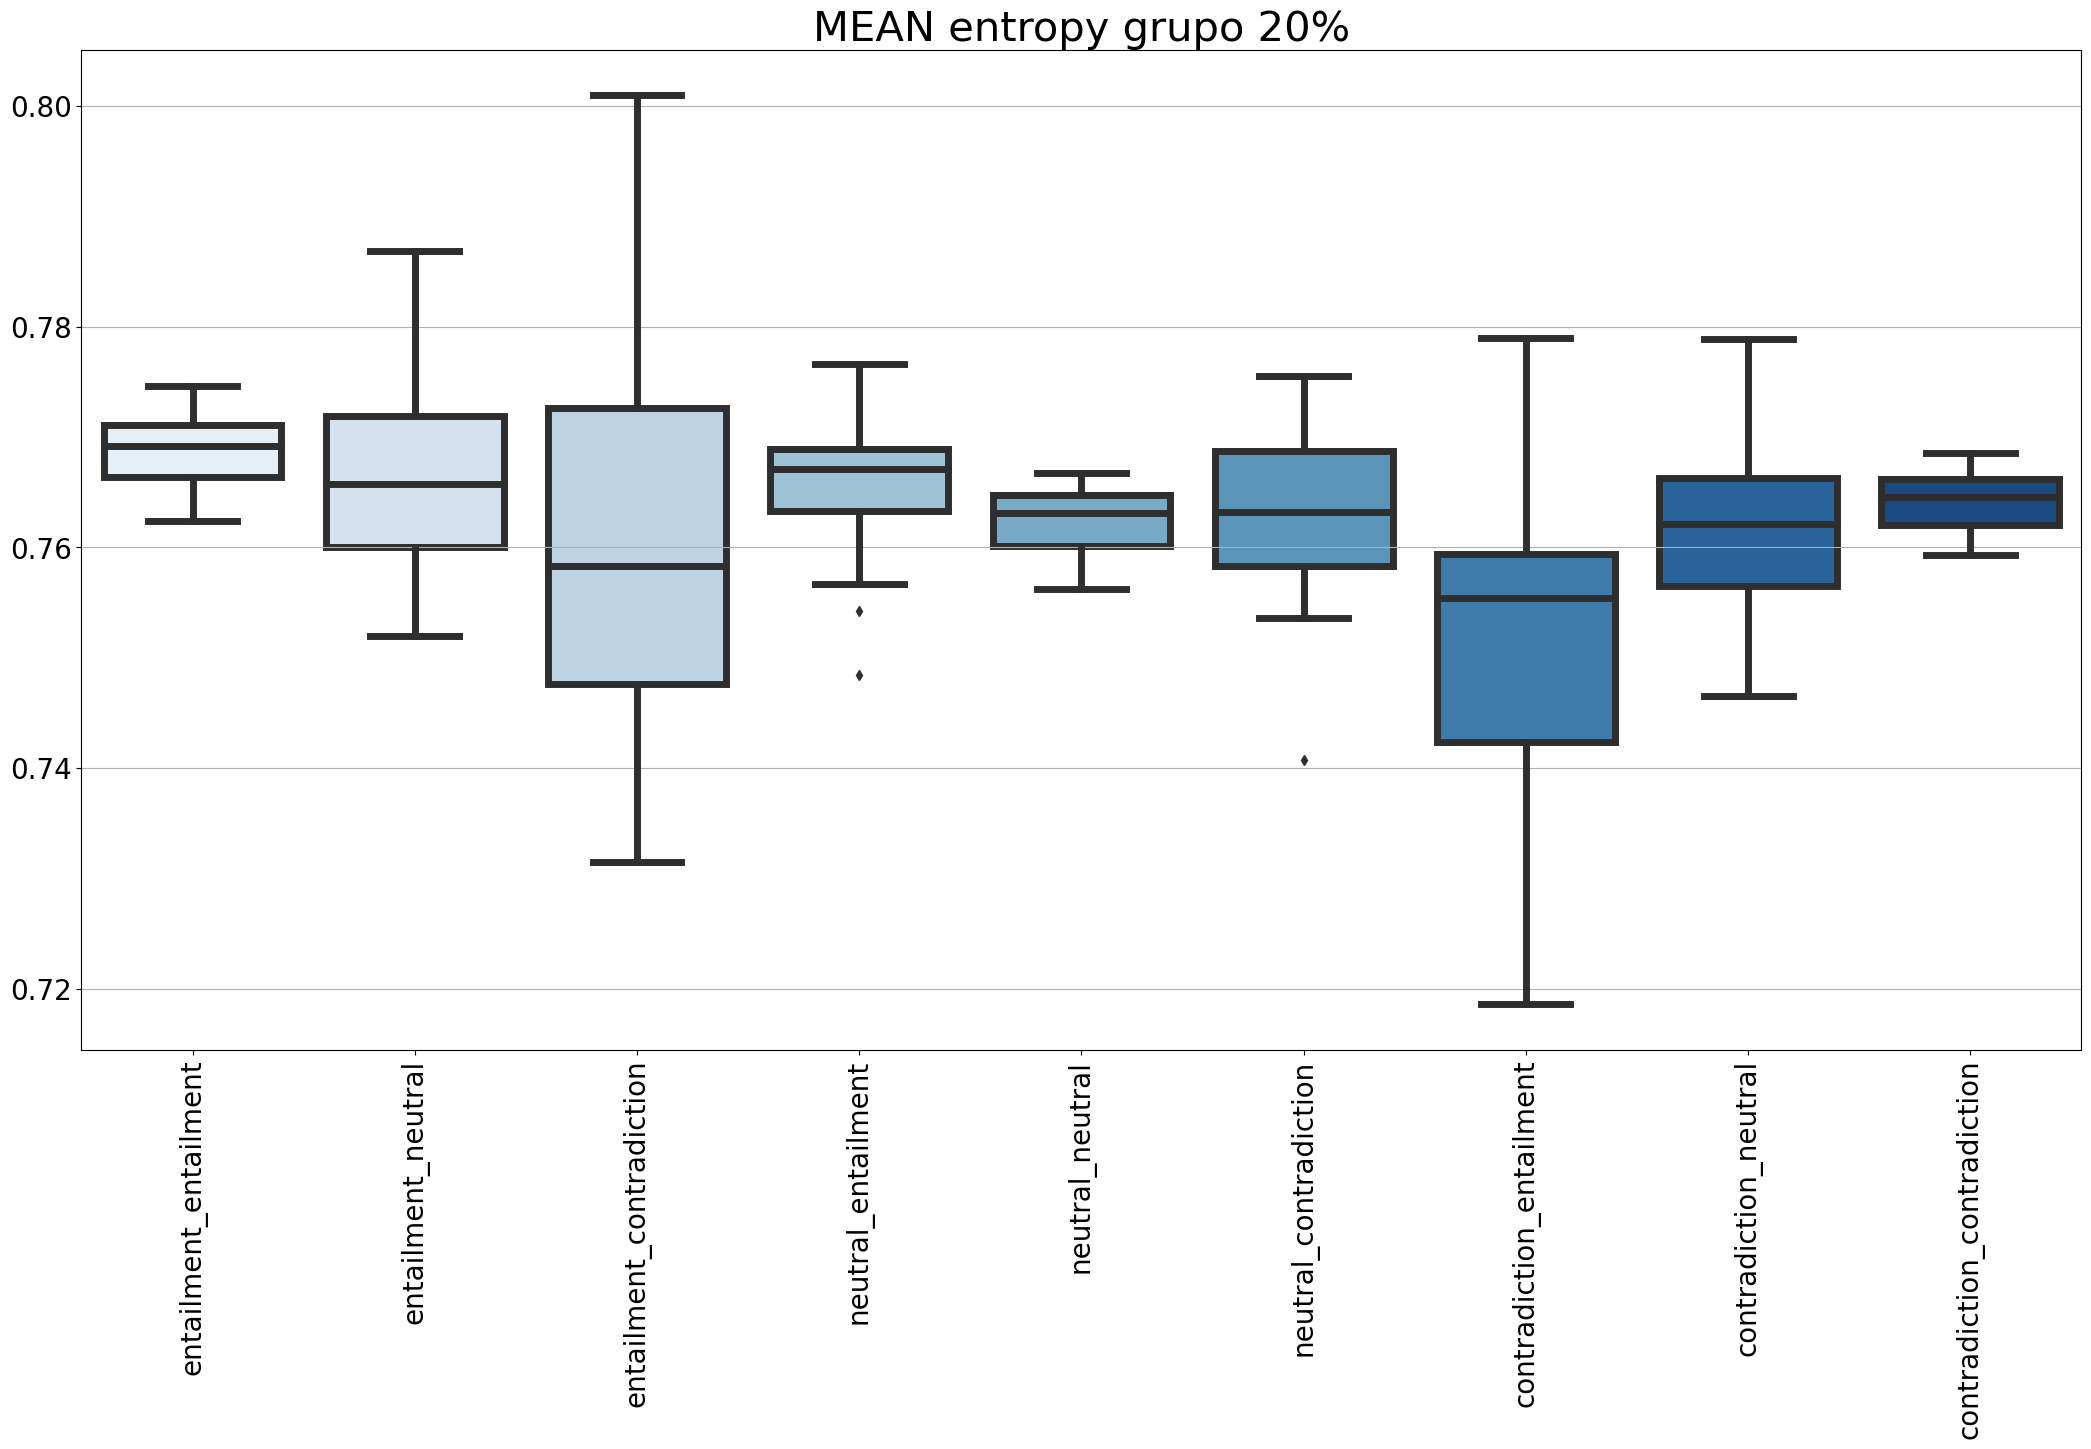

In [408]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[27:36],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[27:36],fontsize=20,rotation=90)
print(grupo_g[27:36])

[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]


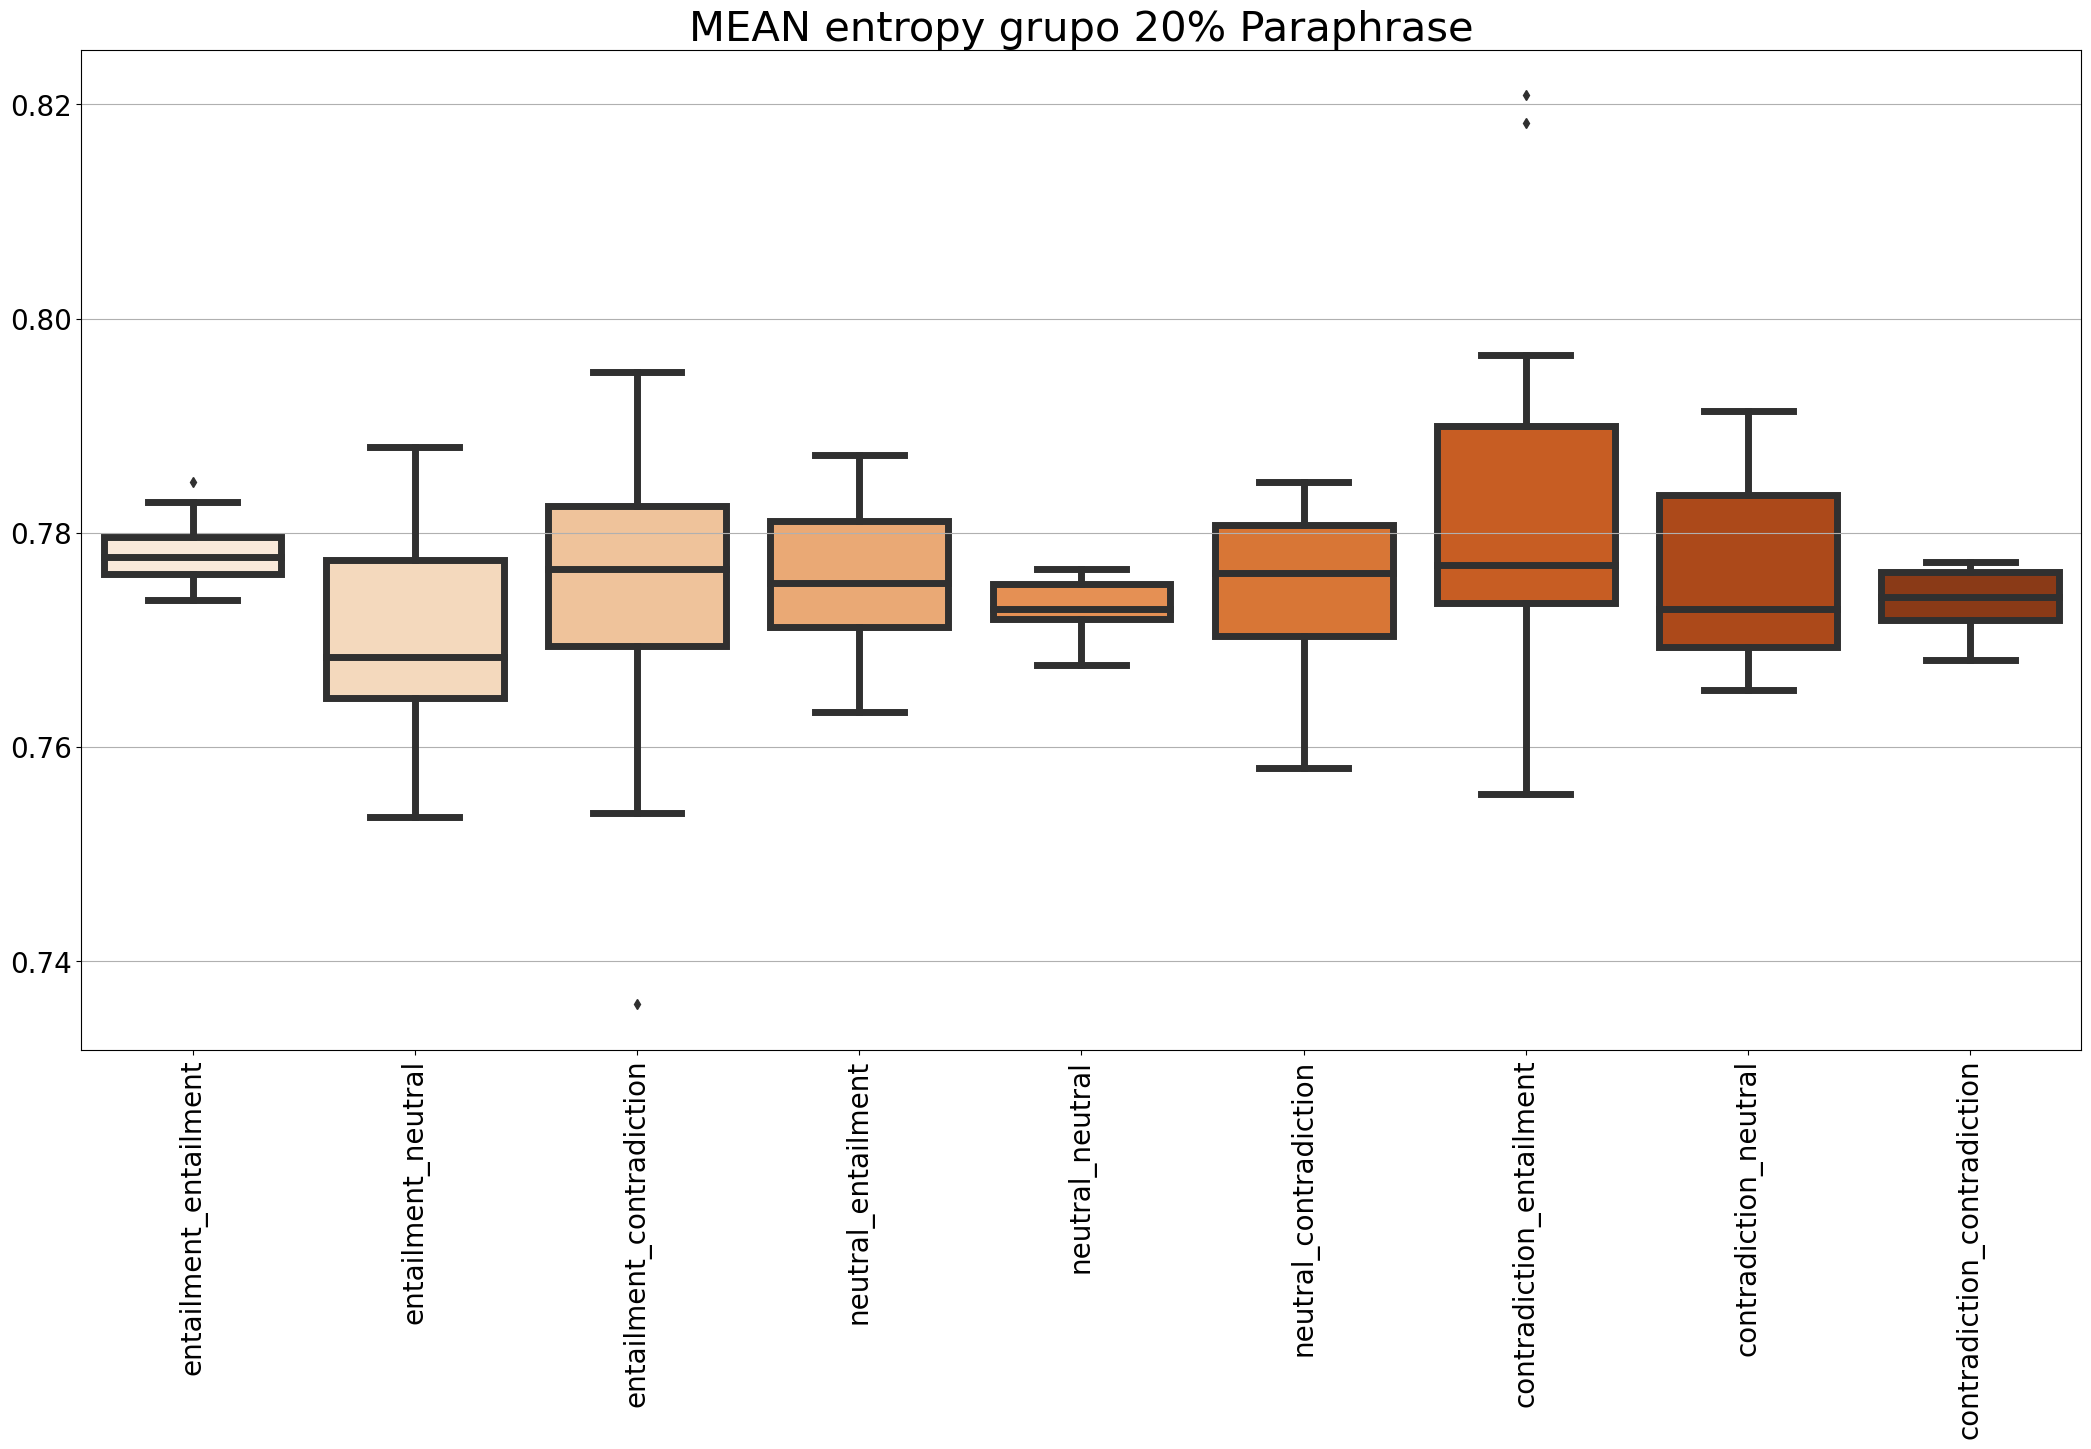

In [409]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[27:36],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[27:36],fontsize=20,rotation=90)
print(grupo_g_p[27:36])

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]


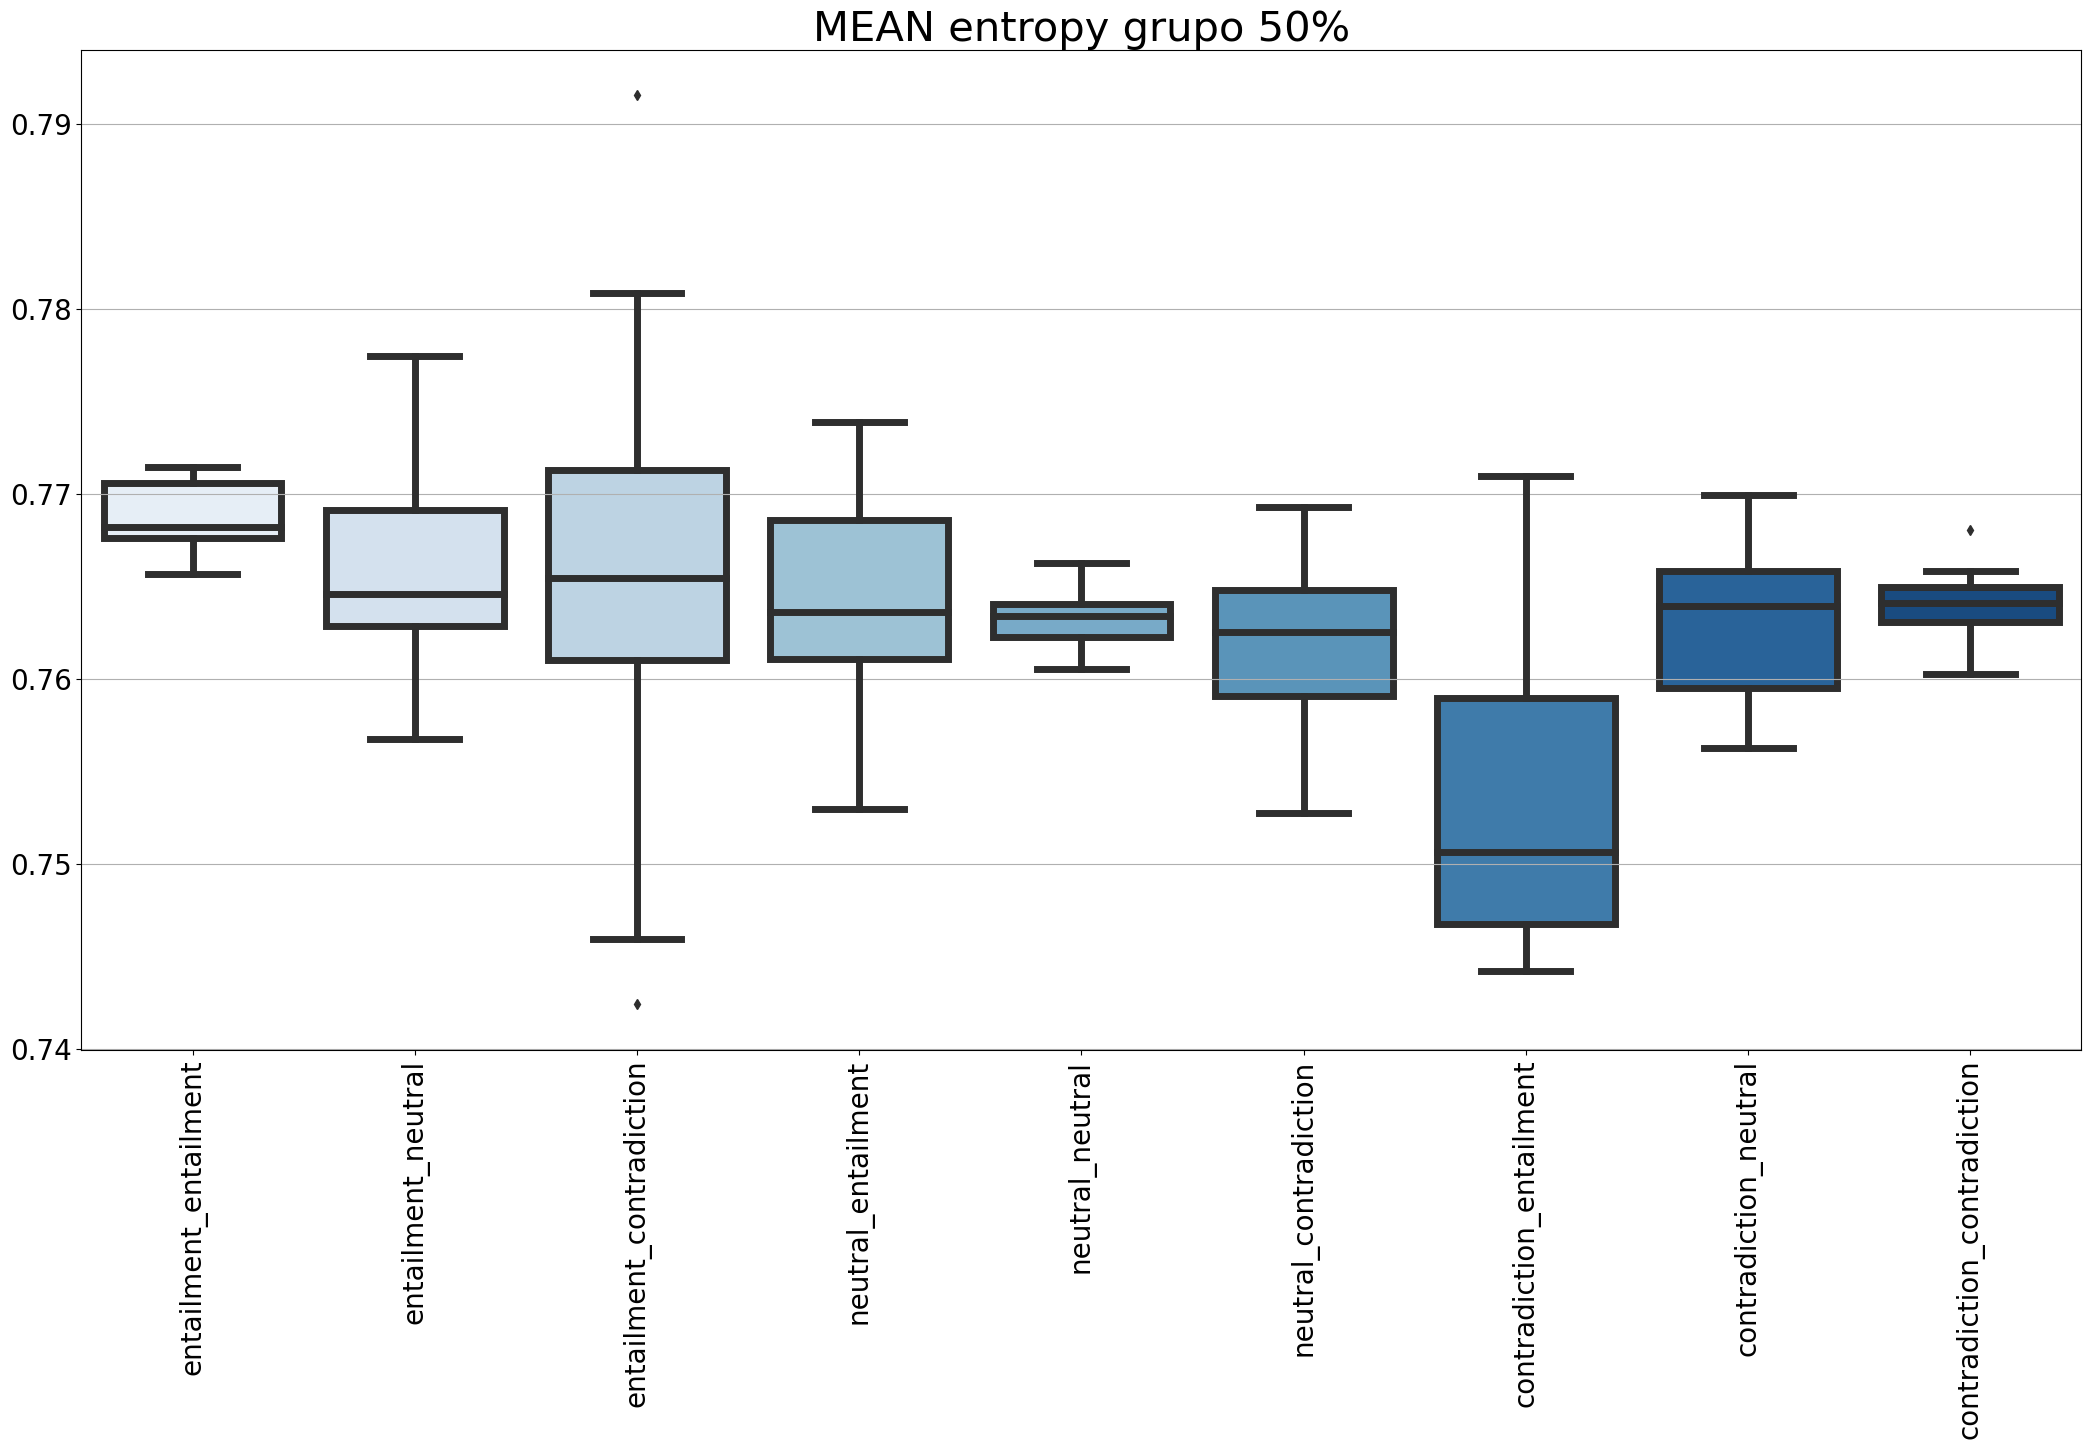

In [410]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[36:45],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[36:45],fontsize=20,rotation=90)
print(grupo_g[36:45])

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]


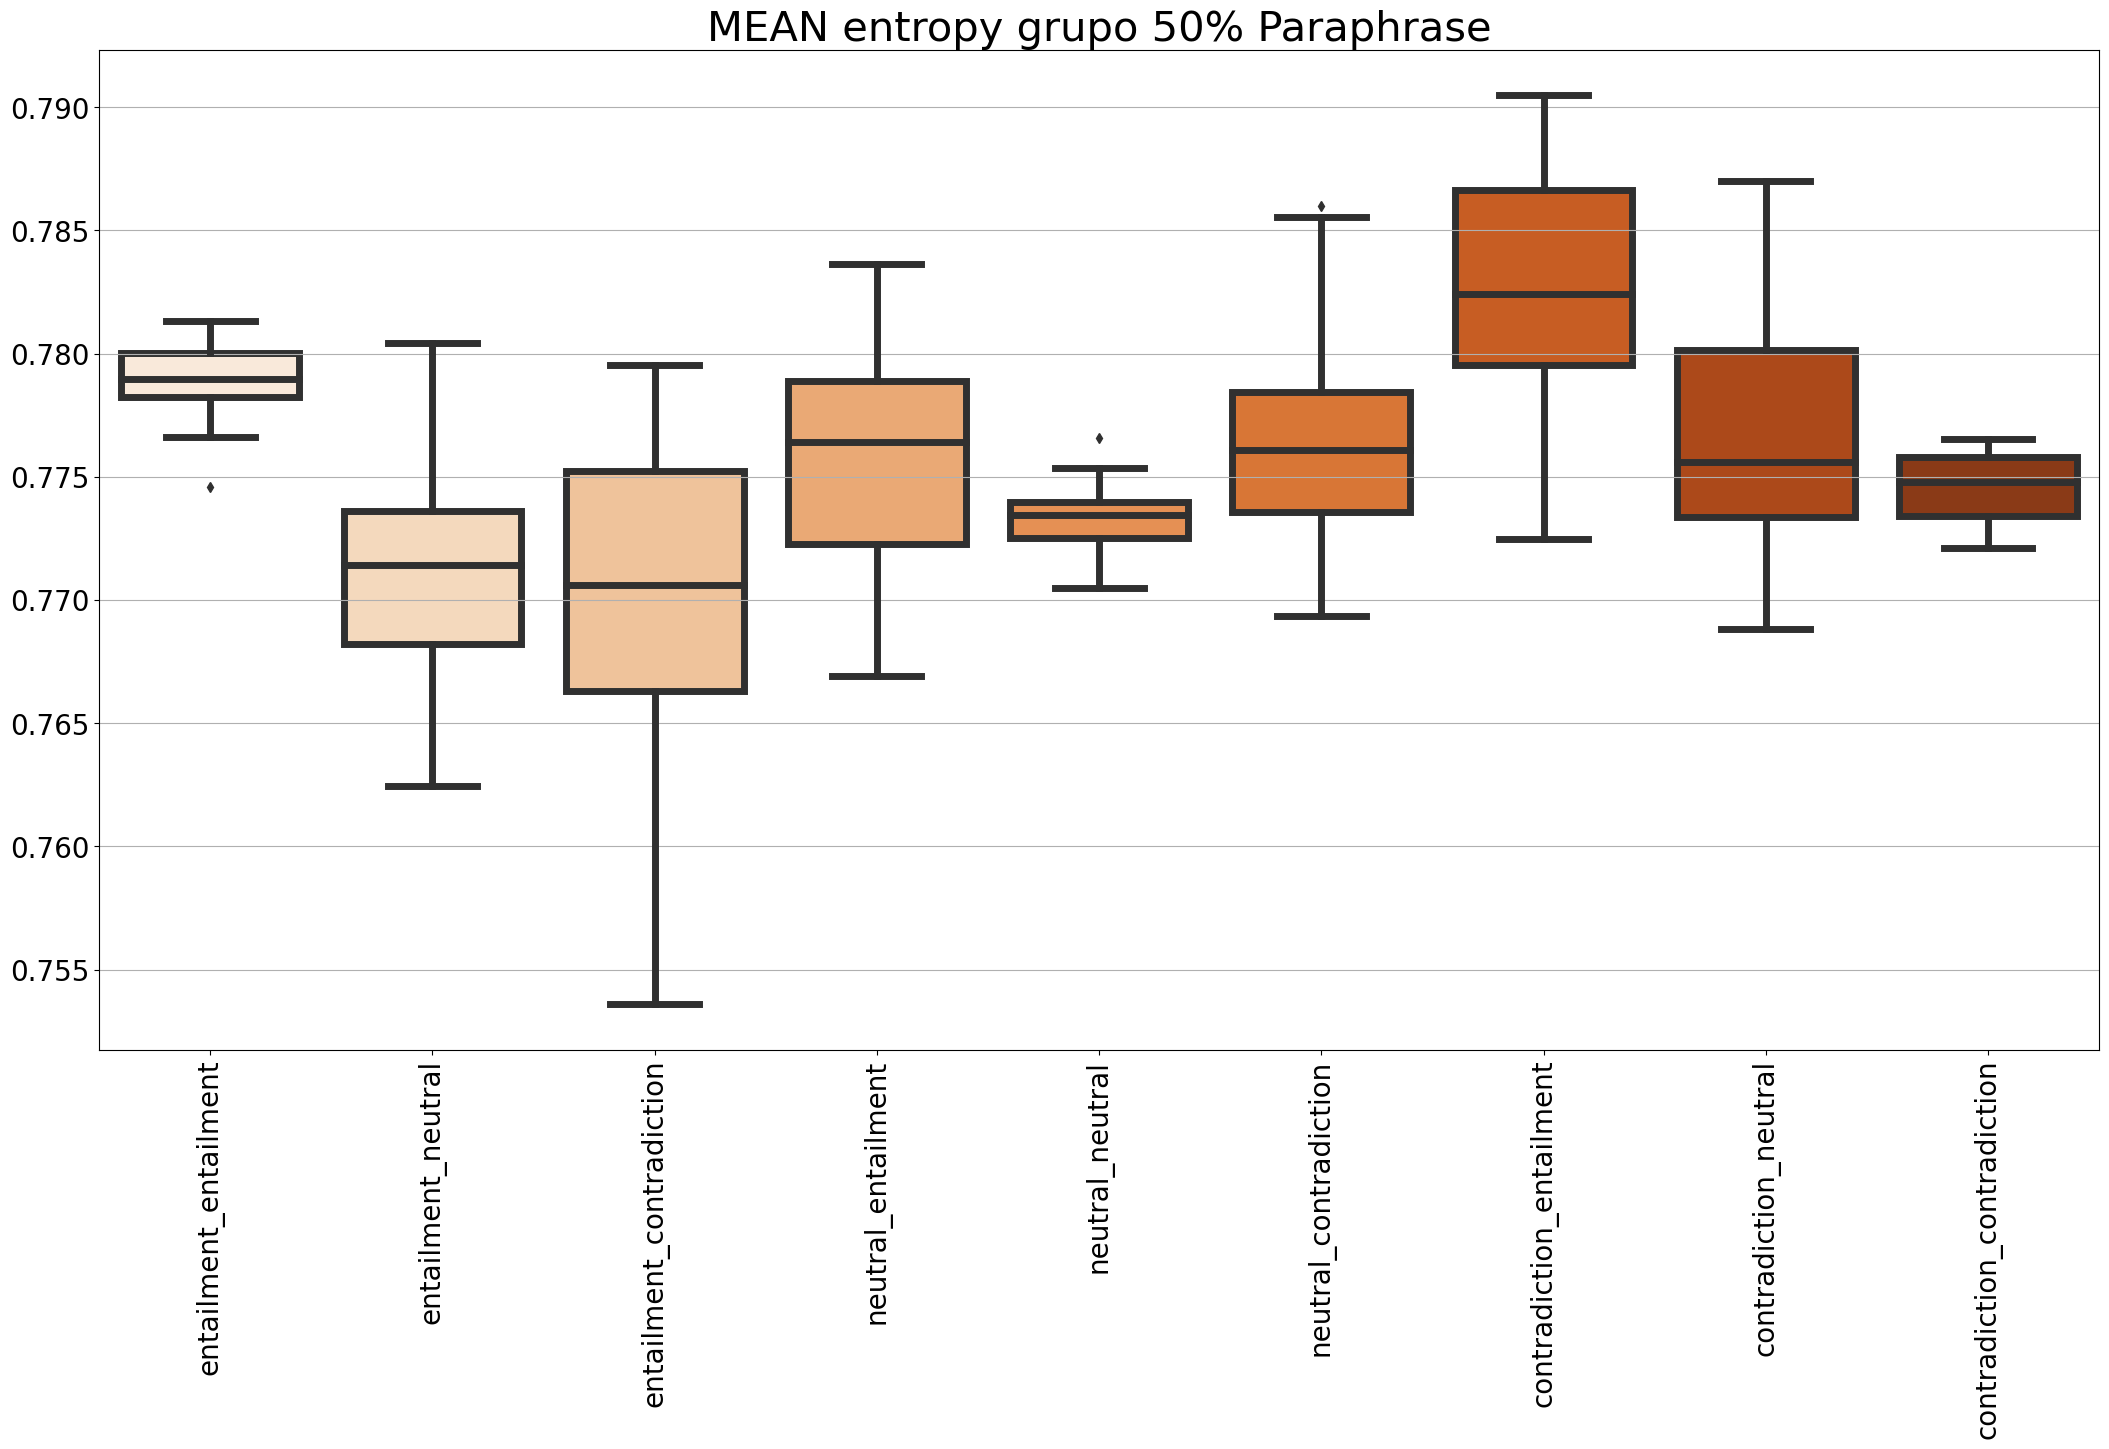

In [411]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[36:45],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[36:45],fontsize=20,rotation=90)
print(grupo_g_p[36:45])

[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0]


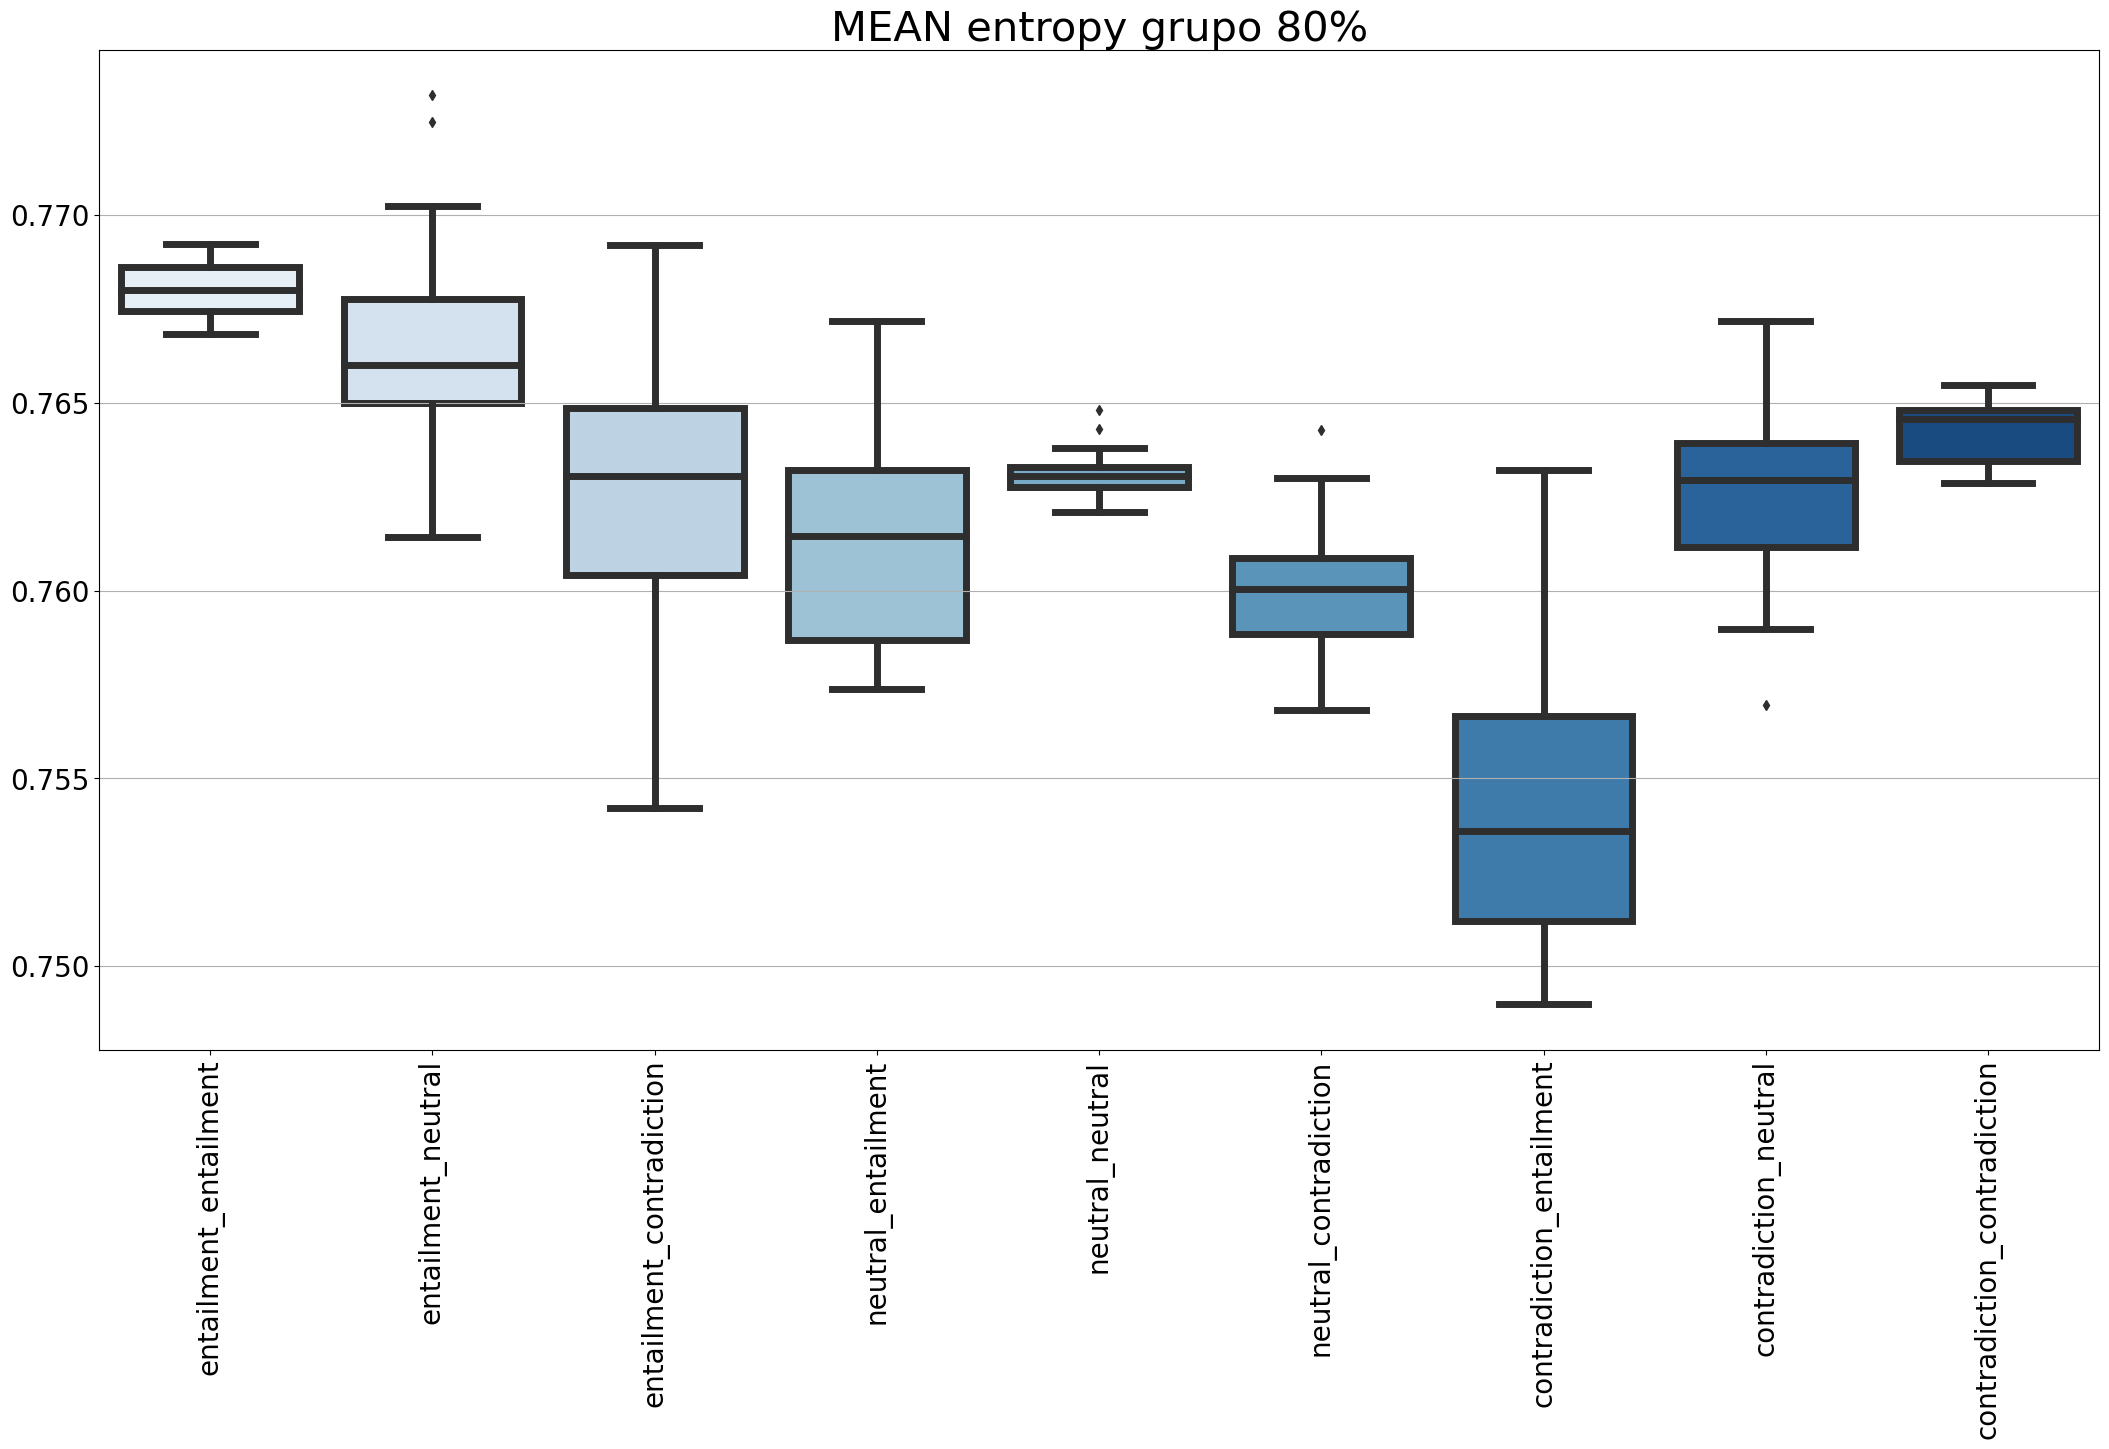

In [412]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[45:54],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g[45:54],fontsize=20,rotation=90)
print(grupo_g[45:54])

[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0]


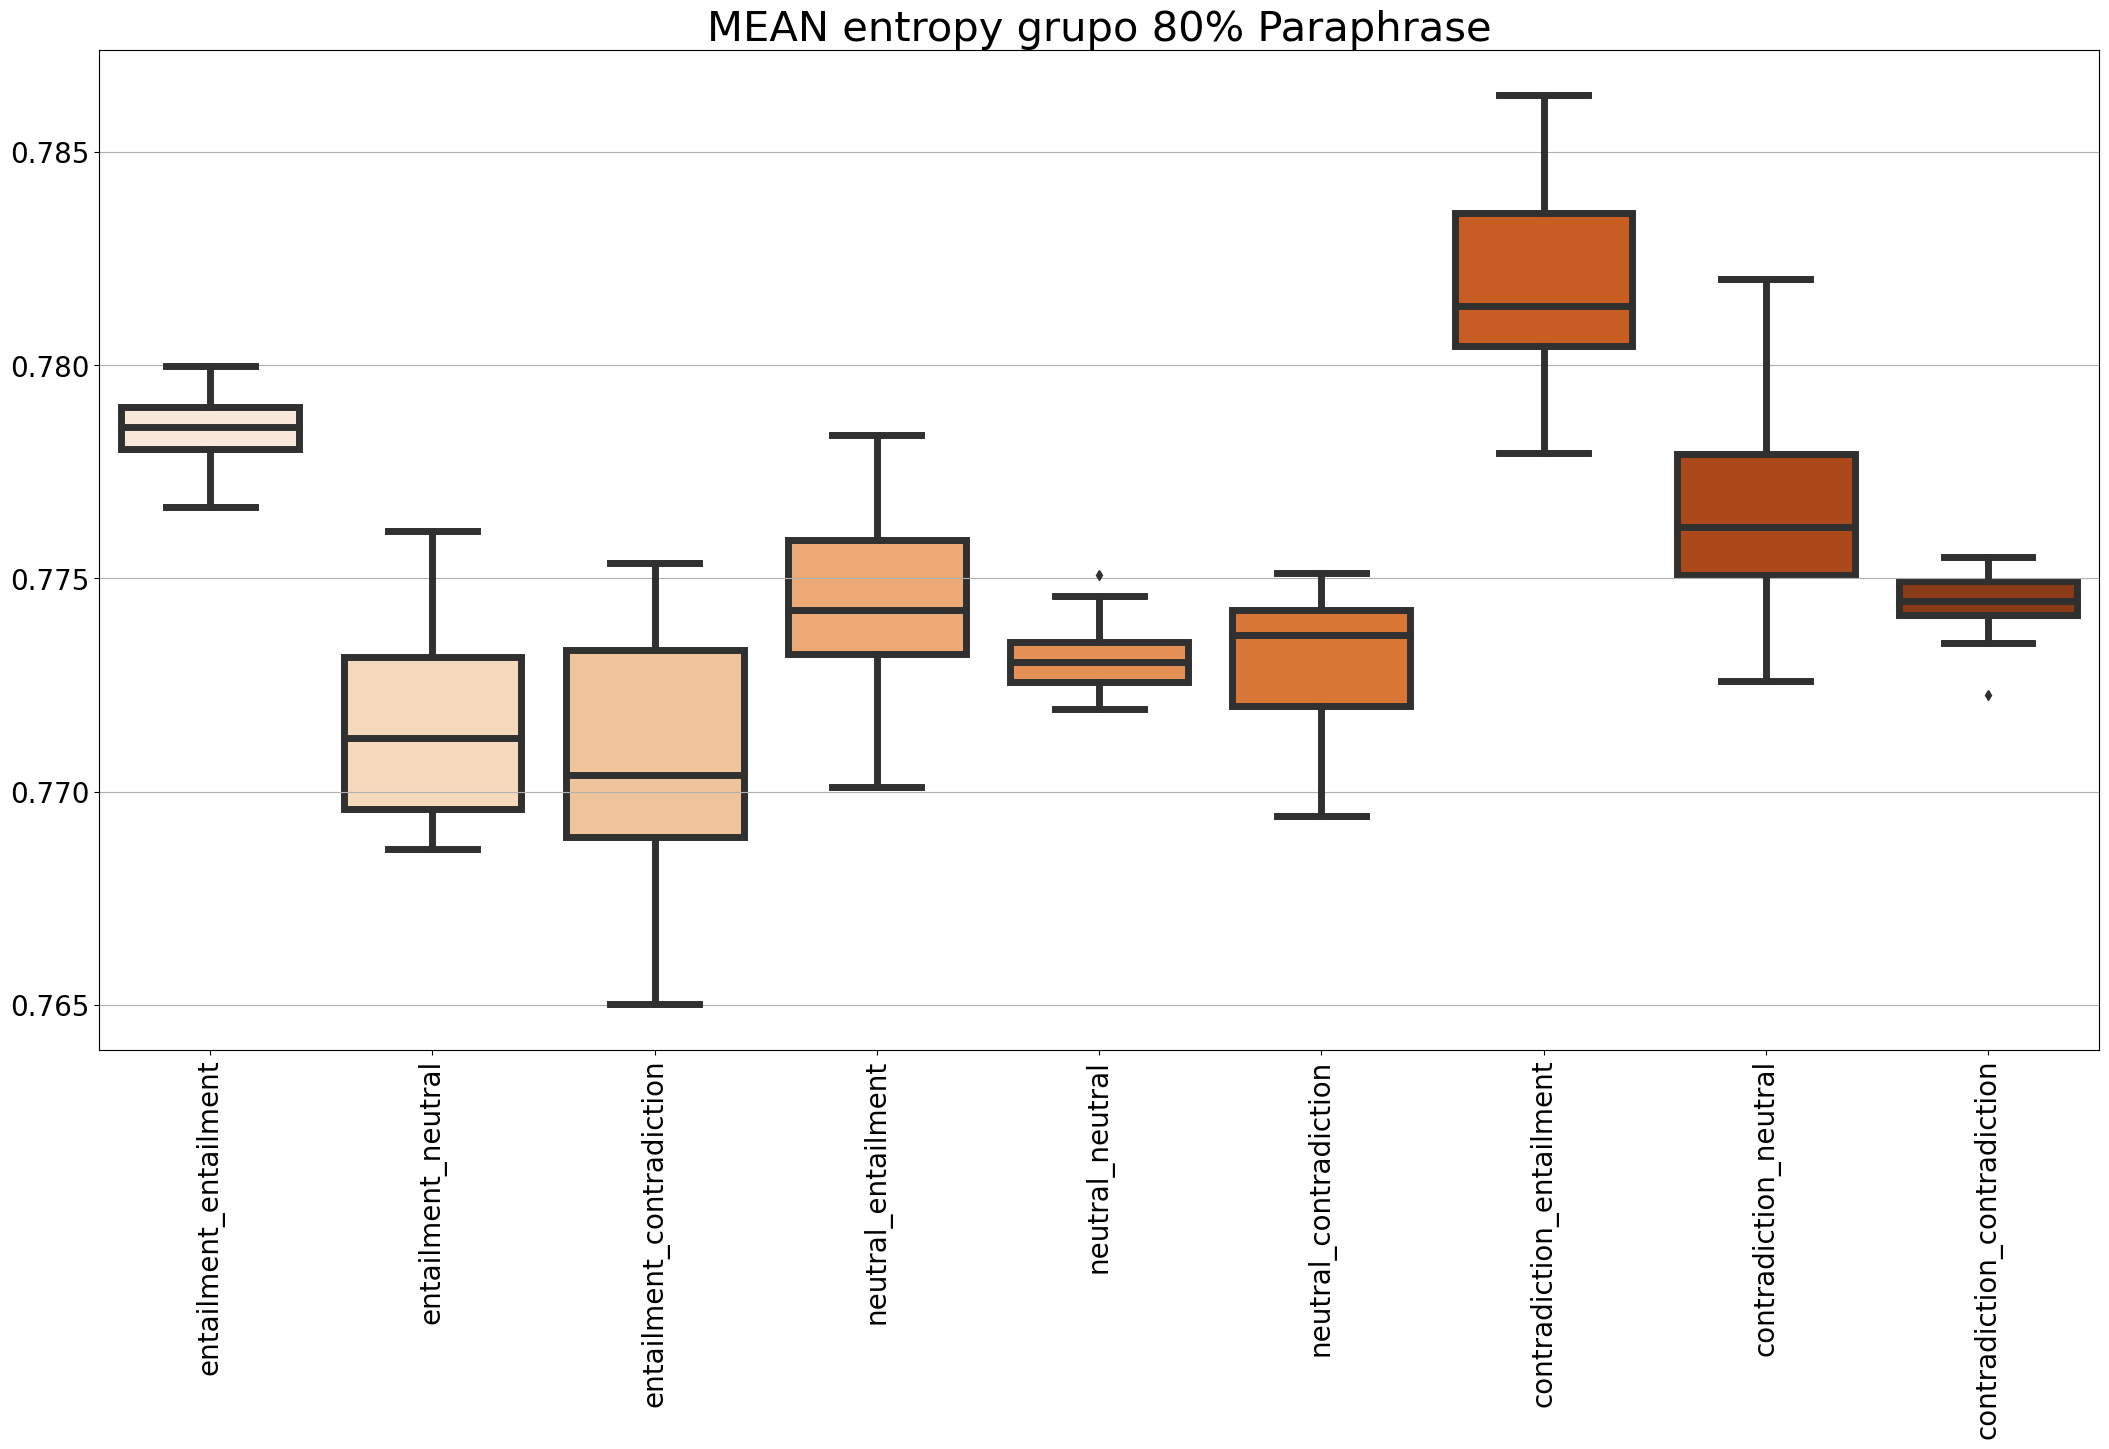

In [413]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[45:54],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g_p[45:54],fontsize=20,rotation=90)
print(grupo_g_p[45:54])

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


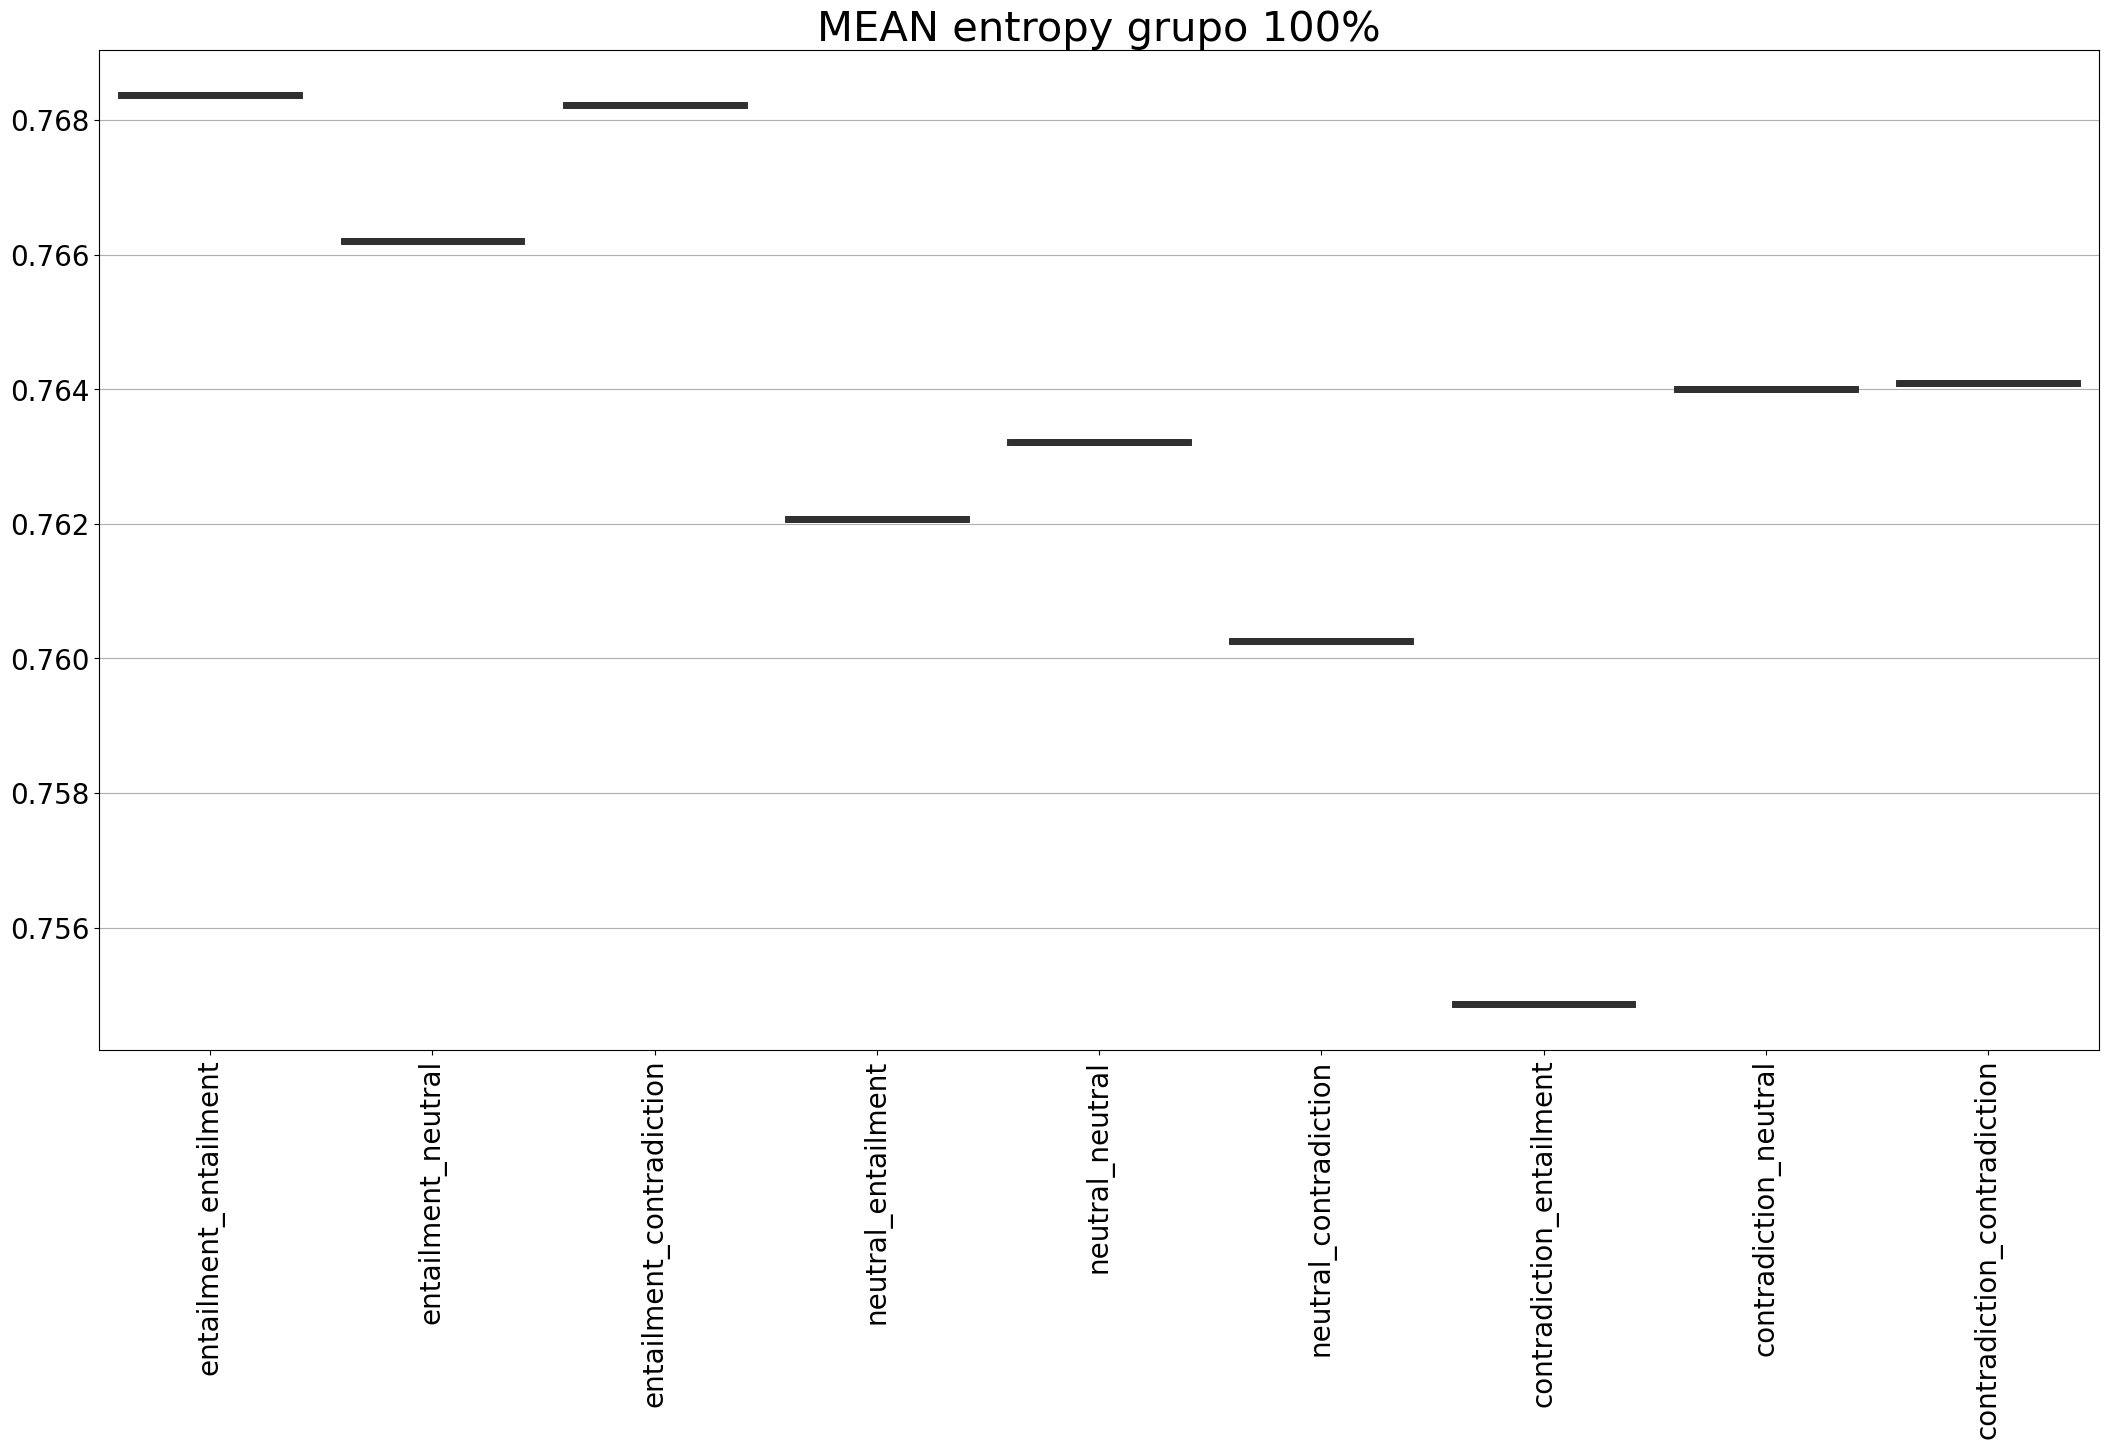

In [274]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[54:63],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[54:63],fontsize=20,rotation=90)
print(grupo_g[54:63])

[]


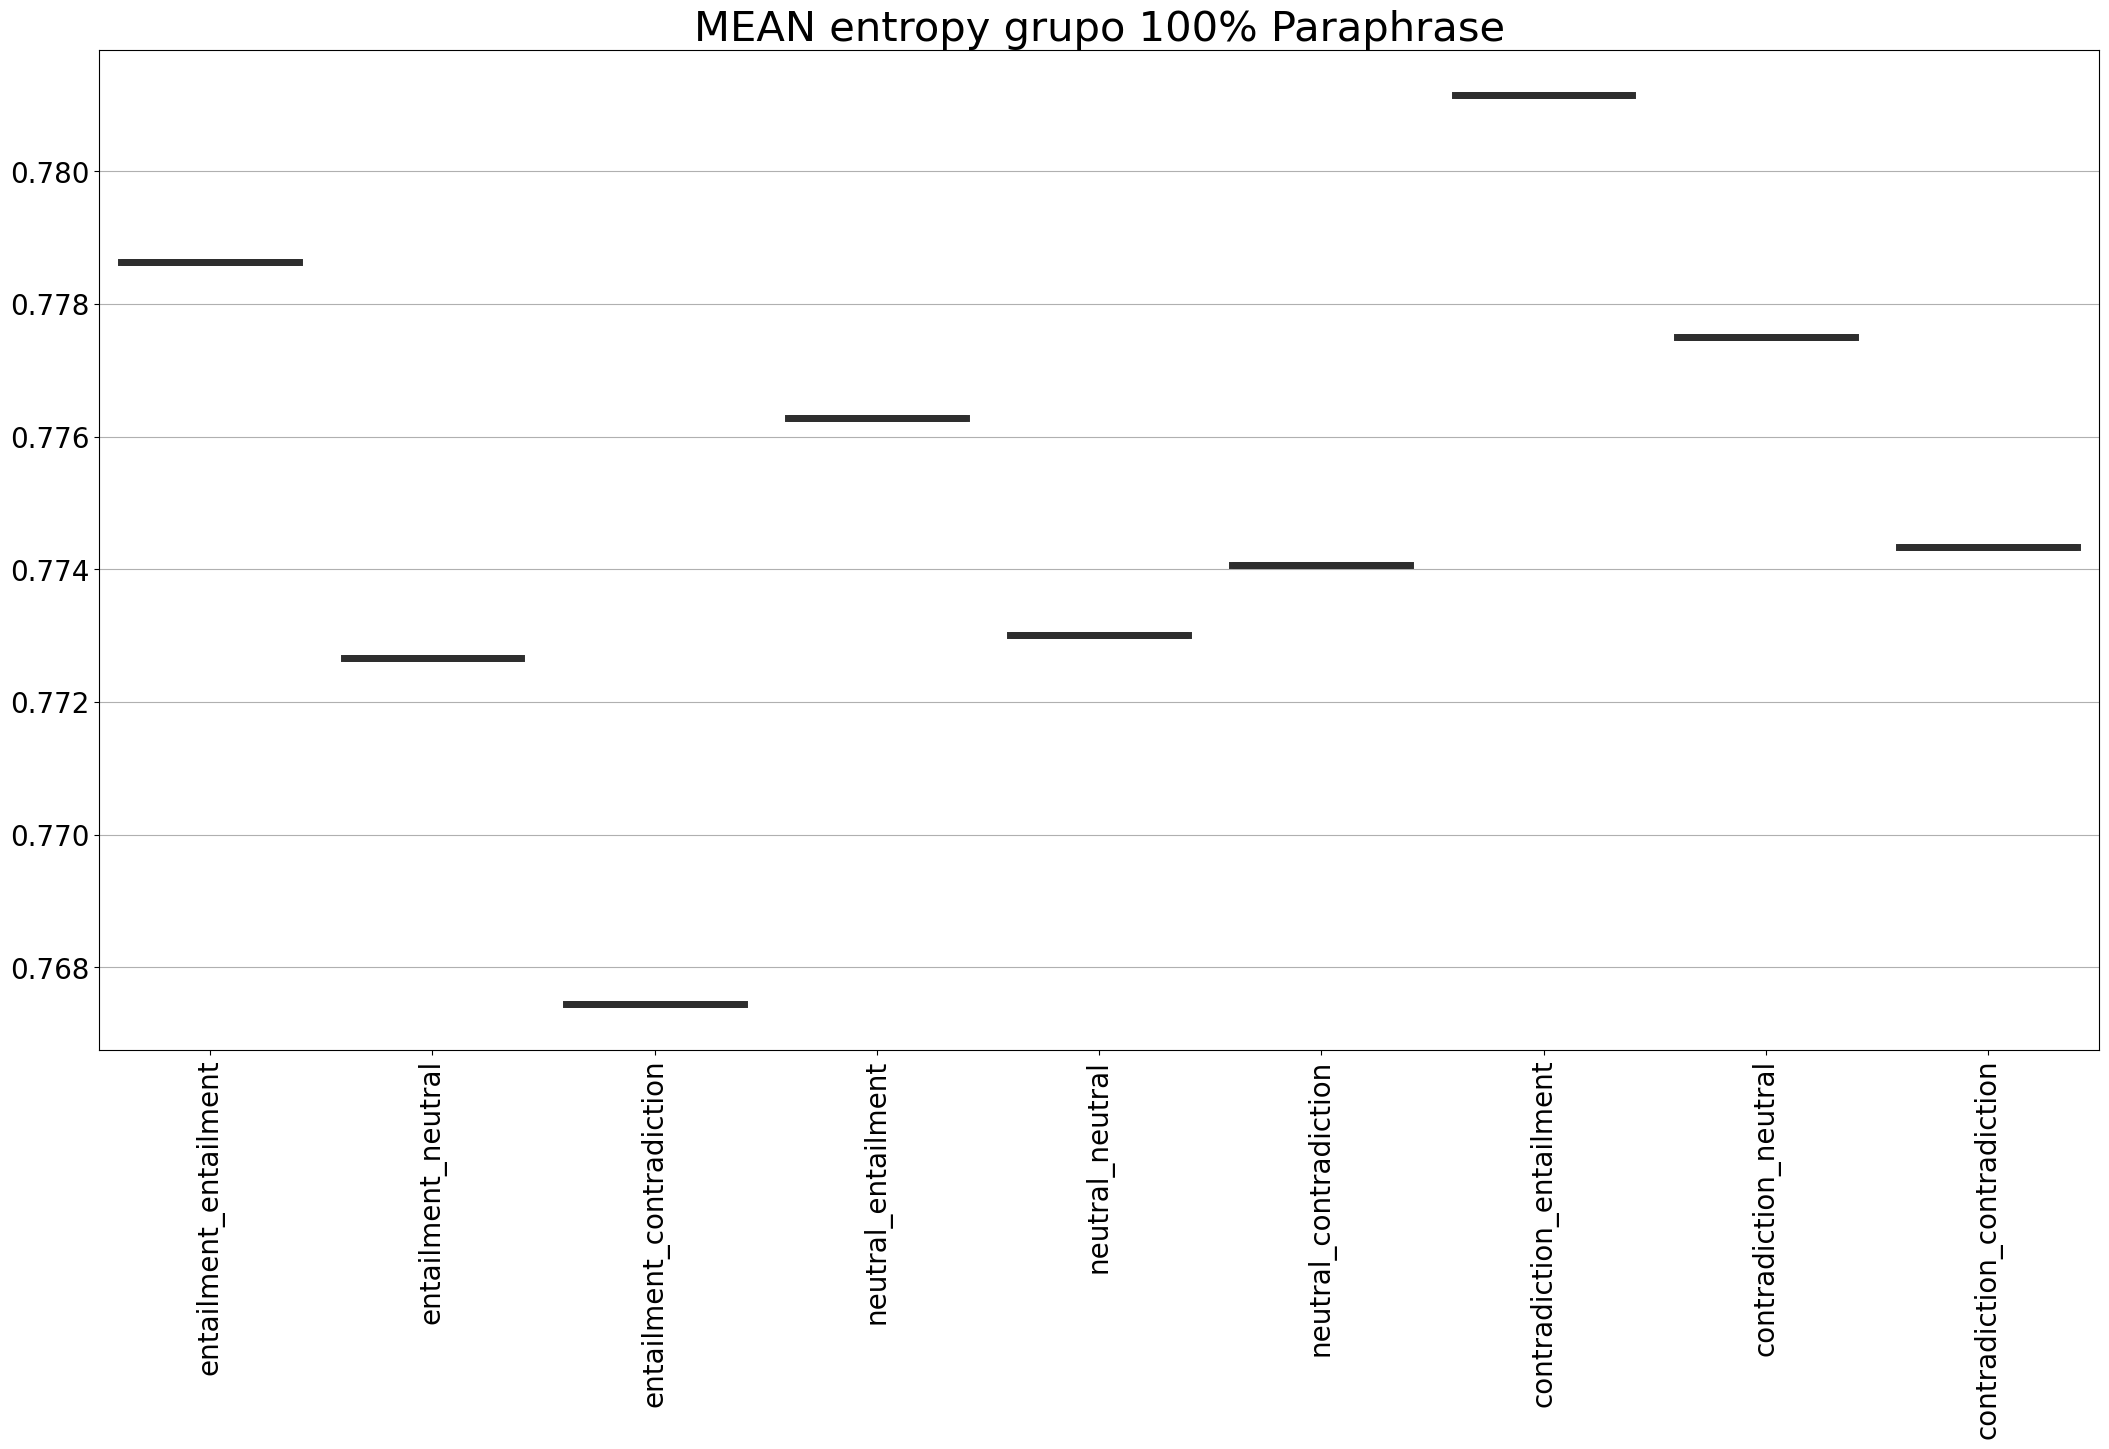

In [276]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100% Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[54:63],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[54:63],fontsize=20,rotation=90)
print(grupo_g[54:36])

In [299]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,91,entailment_entailment,"[0.838, 0.722, 0.816, 0.798, 0.723, 0.848, 0.8...",0
1,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,7,entailment_neutral,"[0.782, 0.764, 0.791, 0.607, 0.749, 0.833, 0.787]",0
2,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[0.901, 0.782, 0.762]",0
3,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,17,neutral_entailment,"[0.798, 0.817, 0.681, 0.817, 0.646, 0.693, 0.7...",0
4,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,103,neutral_neutral,"[0.772, 0.718, 0.752, 0.769, 0.797, 0.755, 0.7...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[0.664, 0.738, 0.762, 0.814, 0.811, 0.797, 0.7...",1
2174,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[0.802, 0.743, 0.803, 0.7, 0.757, 0.877, 0.756...",1
2175,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[0.826, 0.802, 0.89, 0.697, 0.752, 0.654, 0.81...",1
2176,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[0.612, 0.802, 0.787, 0.708, 0.553, 0.797, 0.7...",1


In [300]:
dfn[dfn["Paraphrase"]==1]

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
9,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,87,entailment_entailment,"[0.757, 0.787, 0.82, 0.799, 0.604, 0.749, 0.85...",1
10,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,9,entailment_neutral,"[0.748, 0.796, 0.858, 0.79, 0.753, 0.738, 0.72...",1
11,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,101,5,entailment_contradiction,"[0.753, 0.702, 0.744, 0.827, 0.812]",1
12,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,15,neutral_entailment,"[0.758, 0.71, 0.785, 0.878, 0.736, 0.846, 0.75...",1
13,data/Only_training_hipotesis_salida2\pTEST_new...,5.0,0.csv.pickle,135,103,neutral_neutral,"[0.88, 0.792, 0.683, 0.772, 0.753, 0.787, 0.85...",1
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[0.664, 0.738, 0.762, 0.814, 0.811, 0.797, 0.7...",1
2174,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[0.802, 0.743, 0.803, 0.7, 0.757, 0.877, 0.756...",1
2175,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[0.826, 0.802, 0.89, 0.697, 0.752, 0.654, 0.81...",1
2176,data/Only_training_hipotesis_salida2\pTEST_new...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[0.612, 0.802, 0.787, 0.708, 0.553, 0.797, 0.7...",1


In [302]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# todos 

In [292]:
labels_g=[]
datos_g=[]
for lab in labels:
    l_mean_entropia=[]
    temp=dfn[(dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
    for index,strings in temp.iterrows():
        if(len(strings['entropia'])!=0):
            #l_mean_entropia.append(np.mean(np.round((strings['entropia']-minimo)/(maximo-minimo),2)))
            l_mean_entropia.append(np.mean(strings['entropia']))
    labels_g.append(lab)
    datos_g.append(l_mean_entropia[:])
    l_mean_entropia.clear()

In [303]:
labels_g_p=[]
datos_g_p=[]
for lab in labels:
    l_mean_entropia_p=[]
    temp=dfn[(dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
    for index,strings in temp.iterrows():
        if(len(strings['entropia'])!=0):
            #l_mean_entropia.append(np.mean(np.round((strings['entropia']-minimo)/(maximo-minimo),2)))
            l_mean_entropia_p.append(np.mean(strings['entropia']))
    labels_g_p.append(lab)
    datos_g_p.append(l_mean_entropia_p[:])
    l_mean_entropia_p.clear()

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

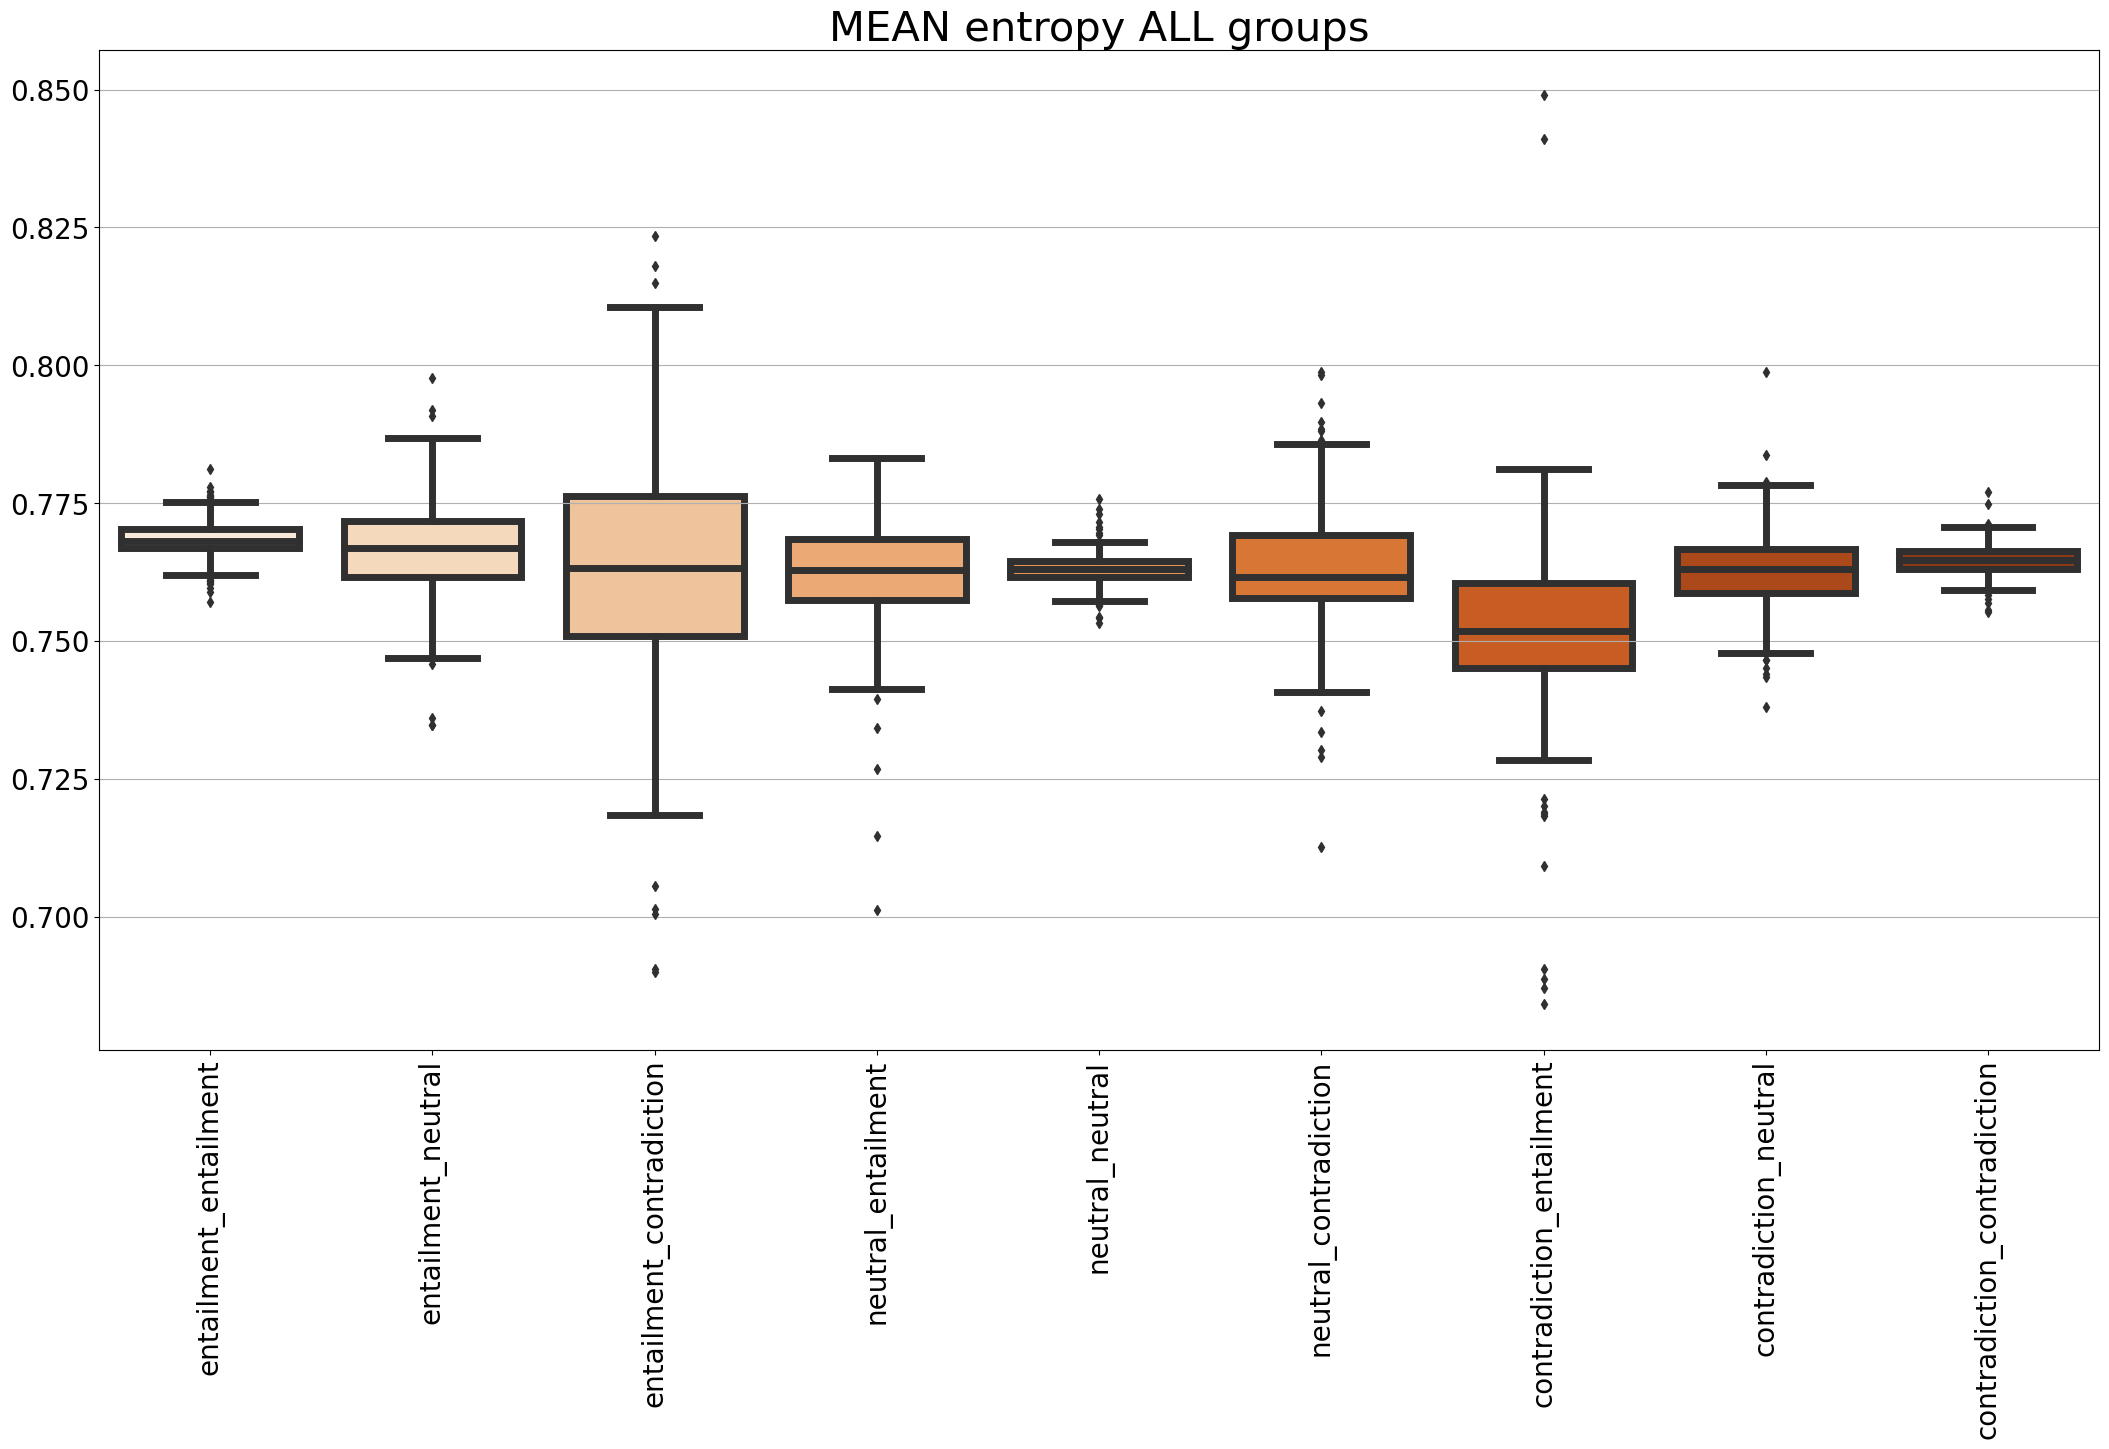

In [305]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy ALL groups",fontsize=30)
bp0 = sns.boxplot(data=datos_g,linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g,fontsize=20,rotation=90)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


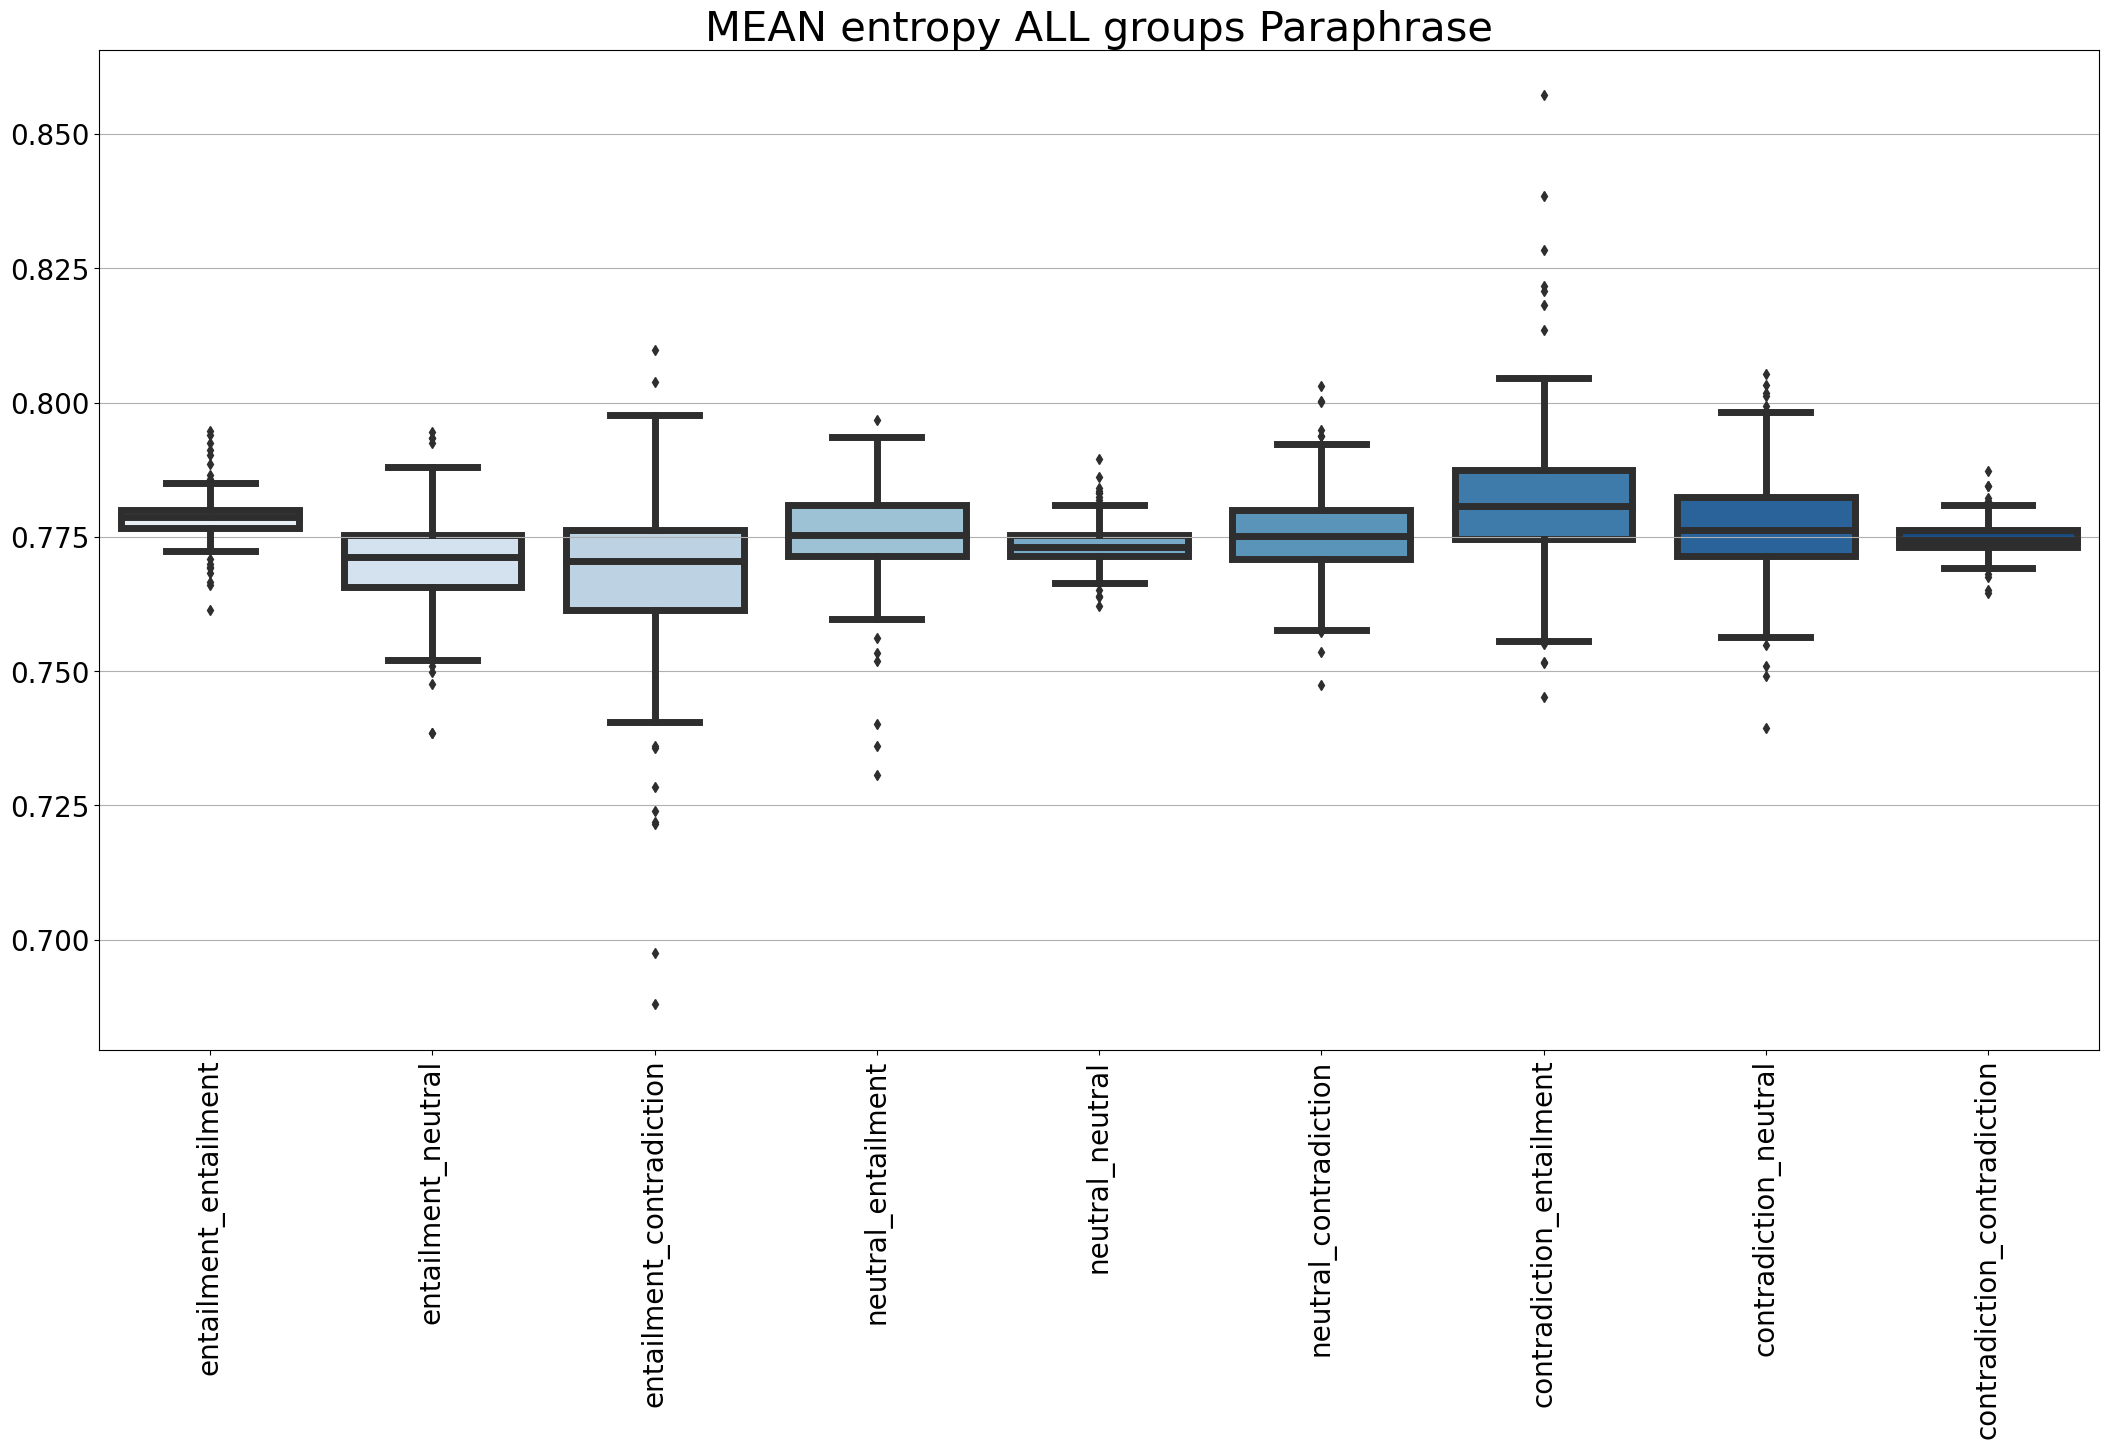

In [306]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy ALL groups Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p,linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p,fontsize=20,rotation=90)
print(grupo_g)

# Solo quedarnos con el 90% de los datos y graficar

In [320]:
print(len(sorted(datos_g[0]))*0.05, min(datos_g[0]),max(datos_g[0]))
print(sorted(datos_g[0]))
print(datos_g[0][int(len(datos_g[0])*0.05):int(len(datos_g[0])*0.95)])

6.050000000000001 0.7571593406593407 0.7812093023255814
[0.7571593406593407, 0.7589060773480665, 0.759626168224299, 0.7602546296296296, 0.7604561403508773, 0.7608124999999999, 0.76089, 0.7610568181818181, 0.7614285714285715, 0.761606936416185, 0.761631970260223, 0.7619719101123595, 0.7620777777777776, 0.7624204545454546, 0.7632022471910112, 0.7641127819548872, 0.7645466666666667, 0.7646060606060606, 0.764756862745098, 0.7651468926553672, 0.7656268221574343, 0.7656464864864865, 0.765900826446281, 0.7660418994413408, 0.766321940463065, 0.7665271739130435, 0.7665366492146597, 0.7665389830508474, 0.7666458333333334, 0.7668384512683579, 0.7669167556029881, 0.7670113636363636, 0.76707118871726, 0.7671827586206896, 0.7672582417582419, 0.7672704471101418, 0.7673120759837178, 0.7673280106453759, 0.7673395721925134, 0.7673407821229049, 0.7673632707774799, 0.7674881194840462, 0.767529255319149, 0.767537886872999, 0.7676537610619469, 0.7676749663526244, 0.7677516960651288, 0.7677929936305732, 0.76

In [415]:
distancias

[[0.7678277966101694,
  0.7692303988995876,
  0.7685743967828418,
  0.7674881194840462,
  0.76707118871726,
  0.7676749663526244,
  0.7677516960651288,
  0.7682302498311951,
  0.7679593333333332,
  0.7687437288135592,
  0.7683960264900662,
  0.7682483355525966,
  0.7668384512683579,
  0.7680237623762376,
  0.7673120759837178,
  0.7687873754152824,
  0.7673632707774799,
  0.7673280106453759,
  0.7692186014935506,
  0.7687772575250836],
 [0.7702298136645963,
  0.77319375,
  0.765024096385542,
  0.7632455089820359,
  0.7651190476190476,
  0.7695000000000001,
  0.7665942857142856,
  0.7655153374233129,
  0.7724658385093167,
  0.7693846153846153,
  0.7668095238095238,
  0.7663271604938272,
  0.7644000000000001,
  0.7653780487804878,
  0.7660535714285714,
  0.7659824561403508,
  0.767236994219653,
  0.7614223602484472,
  0.7637073170731706,
  0.7648972972972973],
 [0.764051282051282,
  0.7569473684210527,
  0.7611860465116279,
  0.7692093023255814,
  0.7638333333333333,
  0.7686410256410255,

In [416]:
datos_g_90=[]
datos_g_p_90=[]
for i in range(len(distancias)):
    l=len(distancias[i])
    tem_data=sorted(distancias[i])
    tem_data = tem_data[int(l*0.05):int(l*0.95)]
    datos_g_90.append(max(tem_data)-min(tem_data))
for i in range(len(distancias_p)):
    l=len(distancias_p[i])
    tem_data=sorted(distancias_p[i])
    tem_data = tem_data[int(l*0.05):int(l*0.95)]
    datos_g_p_90.append(max(tem_data)-min(tem_data))

In [417]:
datos_g_p_90

[0.0020522496371552235,
 0.006345347063310469,
 0.008165349143610112,
 0.0077807295969389845,
 0.0023076038522351627,
 0.003148342723719666,
 0.006000000000000116,
 0.006222088122605496,
 0.0018424365025847544]

In [418]:
labels_g_p=labels_g_p[:9]

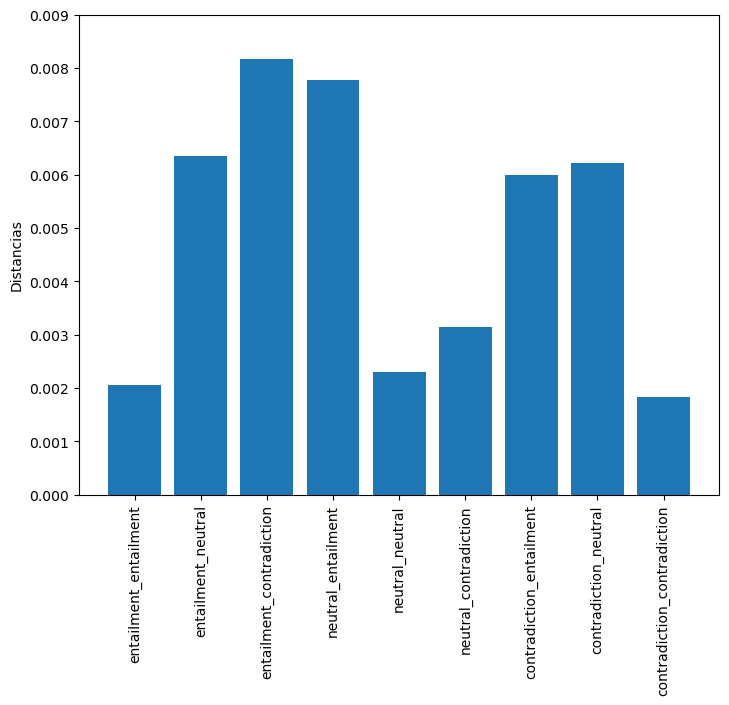

In [419]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Distancias')
ax.bar(labels_g_p,datos_g_p_90)
plt.yticks(np.arange(0, 0.01, step=0.001))
plt.xticks(rotation = 90)
plt.show()

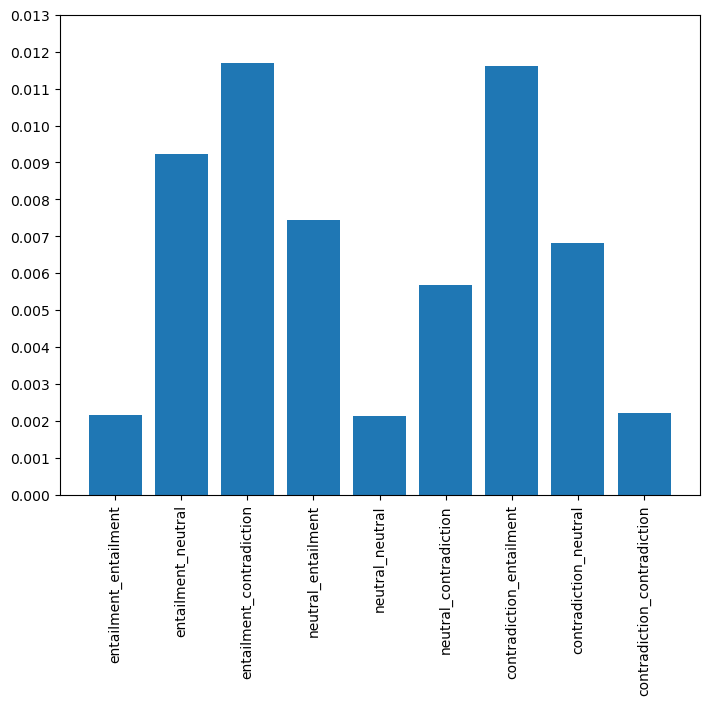

In [423]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels_g_p,datos_g_90)
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 0.014, step=0.001))
plt.show()